## Set Up Dependencies


In [1]:
import seaborn as sns
import pandas as pd
import pecking
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pecking
from teeplot import teeplot as tp

## Data Retrieval and Preprocessing

In [2]:
df = pd.read_parquet("https://osf.io/ah7v5/download")


In [3]:
df["Num Reconstructed Inner Nodes"] = df["num_reconstructed_inner_nodes"]
df["Num True Inner Nodes"] = df["num_true_inner_nodes"]
df["Raw Triplet Distance"] = df["triplet_distance_raw"]
df["Sampled Triplet Distance Strict Reconst"] = df[
    "sampled_triplet_distance_strict_reconst"
]
df["Sampled Triplet Distance Strict"] = df["sampled_triplet_distance_strict"]
df["Sampled Triplet Distance Lax"] = df["sampled_triplet_distance_lax"]
df["Differentia Width (bits)"] = df["differentia_width_bits"]
df["Annotation Size (bits)"] = df["annotation_size_bits"]
df["Algorithm"] = df["algorithm"]
df["Population Size"] = df["population_size"]
df["Num Generations"] = df["num_generations"]
df["Num Islands"] = df["num_islands"]
df["Num Niches"] = df["num_niches"]
df["Tournament Size"] = df["tournament_size"]
df["Replicate"] = df["replicate"]
df["Downsample"] = df["downsample"]


In [4]:
df["Inner Node Resolution"] = (
    df["Num Reconstructed Inner Nodes"] / df["Num True Inner Nodes"]
)
df["Inner Node Loss"] = 1 - df["Inner Node Resolution"]


In [5]:
df["Dynamics"] = (
    "islands"
    + df["Num Islands"].astype(str)
    + "-niches"
    + df["Num Niches"].astype(str)
    + "-tsize"
    + df["Tournament Size"].astype(str)
)


In [6]:
df["Scale"] = (
    "npop"
    + df["Population Size"].astype(str)
    + "-ngen"
    + df["Num Generations"].astype(str)
)


In [7]:
df["Triplet\nDistance"] = df["Raw Triplet Distance"]
df["Sampled\nTriplet\nDistance\nStrict"] = df["Sampled Triplet Distance Strict"]
df["Sampled\nTriplet\nDistance\nStrict Reconst"] = df[
    "Sampled Triplet Distance Strict Reconst"
]
df["Sampled\nTriplet\nDistance\nLax"] = df["Sampled Triplet Distance Lax"]
df["Inner\nNode\nResolution"] = df["Inner Node Resolution"]
df["Inner\nNode\nLoss"] = df["Inner Node Loss"]
df["Num\nReconstructed\nInner\nNodes"] = df["Num Reconstructed Inner Nodes"]
df["Num\nTrue\nInner\nNodes"] = df["Num True Inner Nodes"]


In [8]:
df["Scenario"] = df["Dynamics"].map(
    {
        "islands1-niches1-tsize2": "plain",
        "islands1-niches1-tsize1": "drift",
        "islands4-niches2-tsize2": "spatial/ecological mild",
        "islands64-niches8-tsize2": "spatial/ecological strong",
    }
)

In [9]:
dfx = df.melt(
    id_vars=[
        "Algorithm",
        "Annotation Size (bits)",
        "Differentia Width (bits)",
        "Downsample",
        "Dynamics",
        "Scenario",
        "Scale",
        "Population Size",
        "Num Generations",
        "Num Islands",
        "Num Niches",
        "Tournament Size",
        "Replicate",
    ],
    value_vars=[
        # "Triplet\nDistance",
        "Sampled\nTriplet\nDistance\nStrict",
        "Sampled\nTriplet\nDistance\nStrict Reconst",
        # "Sampled\nTriplet\nDistance\nLax",
        "Inner\nNode\nLoss",
    ],
)
dfx.head()


Algorithm  Annotation Size (bits)  Differentia Width (bits)  Downsample  \
0  col-steady                     256                         8         500   
1  col-steady                     256                         8         500   
2  col-steady                     256                         8         500   
3  col-steady                     256                         8         500   
4  col-steady                     256                         8         500   

                  Dynamics                 Scenario                Scale  \
0  islands4-niches2-tsize2  spatial/ecological mild  npop4096-ngen100000   
1  islands4-niches2-tsize2  spatial/ecological mild  npop4096-ngen100000   
2  islands4-niches2-tsize2  spatial/ecological mild  npop4096-ngen100000   
3  islands4-niches2-tsize2  spatial/ecological mild  npop4096-ngen100000   
4  islands4-niches2-tsize2  spatial/ecological mild  npop4096-ngen100000   

   Population Size  Num Generations  Num Islands  Num Niches  Tournament Size  \
0             4096           100000            4           2                2   
1             4096           100000            4           2                2   
2             4096           100000            4           2                2   
3             4096           100000            4           2                2   
4             4096           100000            4           2                2   

   Replicate                            variable     value  
0          4  Sampled\nTriplet\nDistance\nStrict  1.000000  
1         12  Sampled\nTriplet\nDistance\nStrict  1.000000  
2          2  Sampled\nTriplet\nDistance\nStrict  1.000000  
3         19  Sampled\nTriplet\nDistance\nStrict  0.259036  
4          1  Sampled\nTriplet\nDistance\nStrict  1.000000

## Visualize Main Metrics

teeplots/a=focal+col=scenario+hue=algorithm+post=teed-figure-subplots-adjust-right-0-84+row=scale+score=value+sizebits=32+viz=peckplot+x=variable+x-group=outer+y=value+ext=.pdf


teeplots/a=focal+col=scenario+hue=algorithm+post=teed-figure-subplots-adjust-right-0-84+row=scale+score=value+sizebits=32+viz=peckplot+x=variable+x-group=outer+y=value+ext=.png


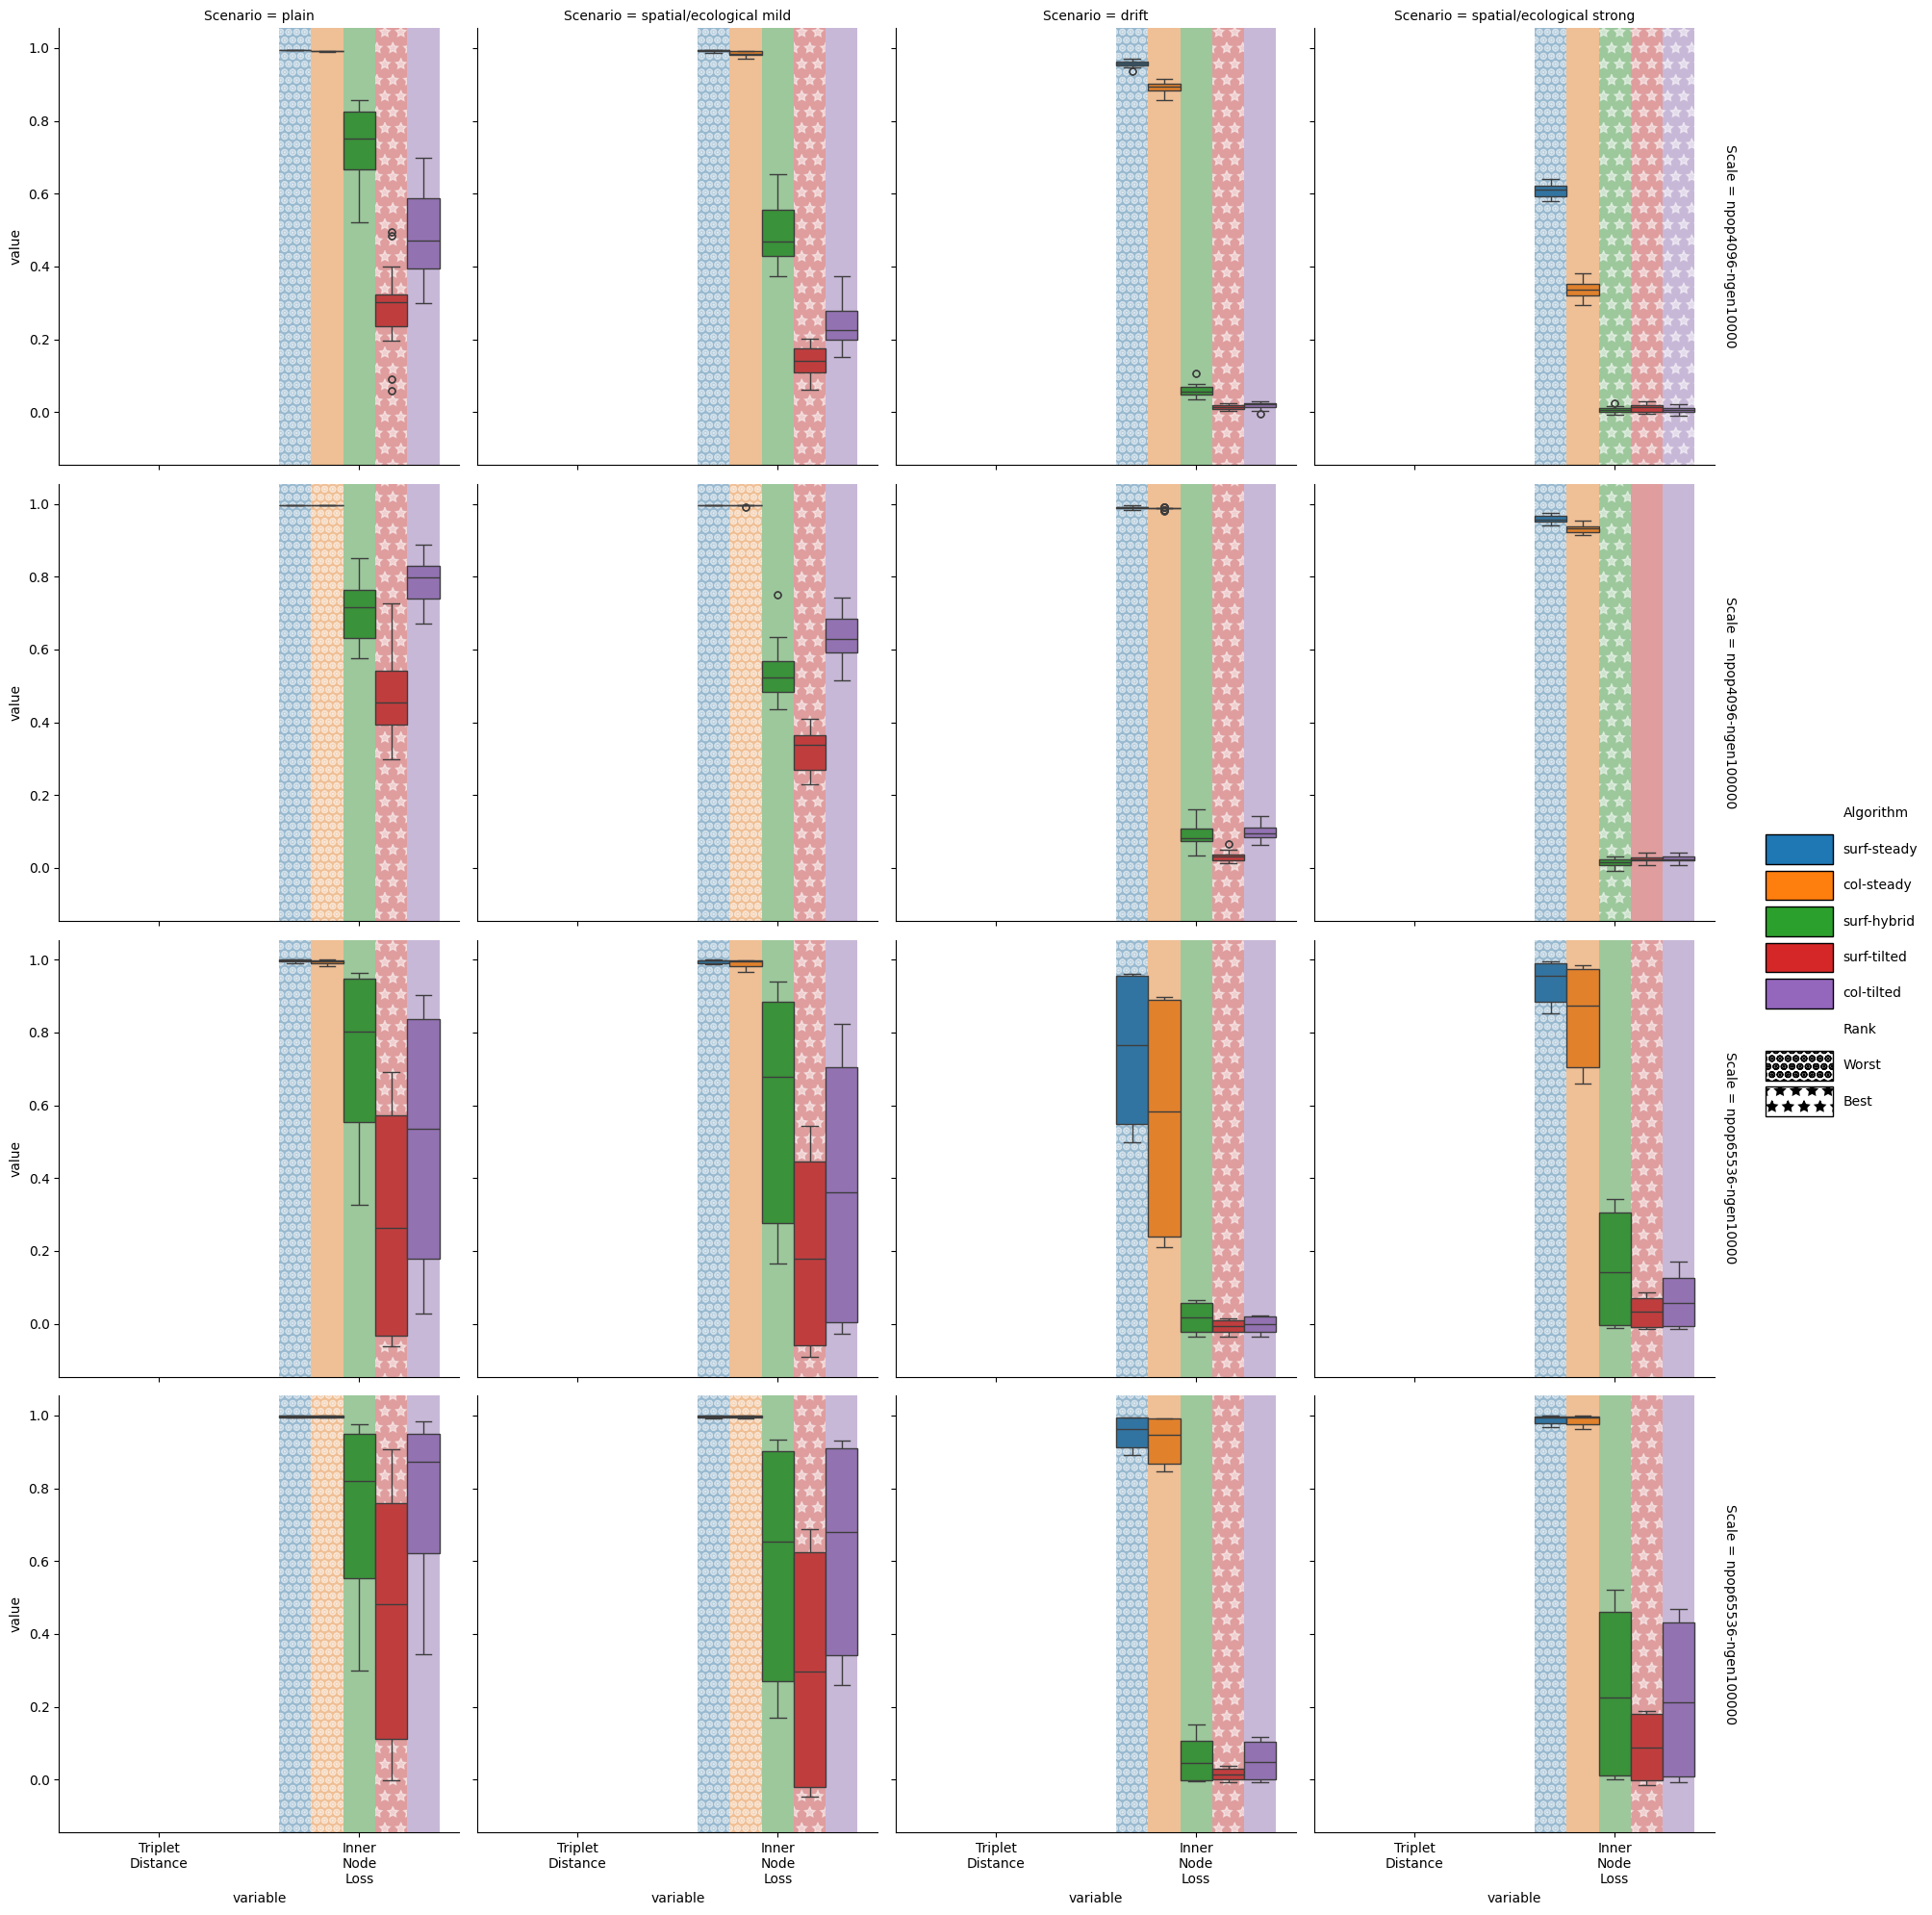

teeplots/a=focal+col=scenario+hue=algorithm+post=teed-figure-subplots-adjust-right-0-84+row=scale+score=value+sizebits=64+viz=peckplot+x=variable+x-group=outer+y=value+ext=.pdf


teeplots/a=focal+col=scenario+hue=algorithm+post=teed-figure-subplots-adjust-right-0-84+row=scale+score=value+sizebits=64+viz=peckplot+x=variable+x-group=outer+y=value+ext=.png


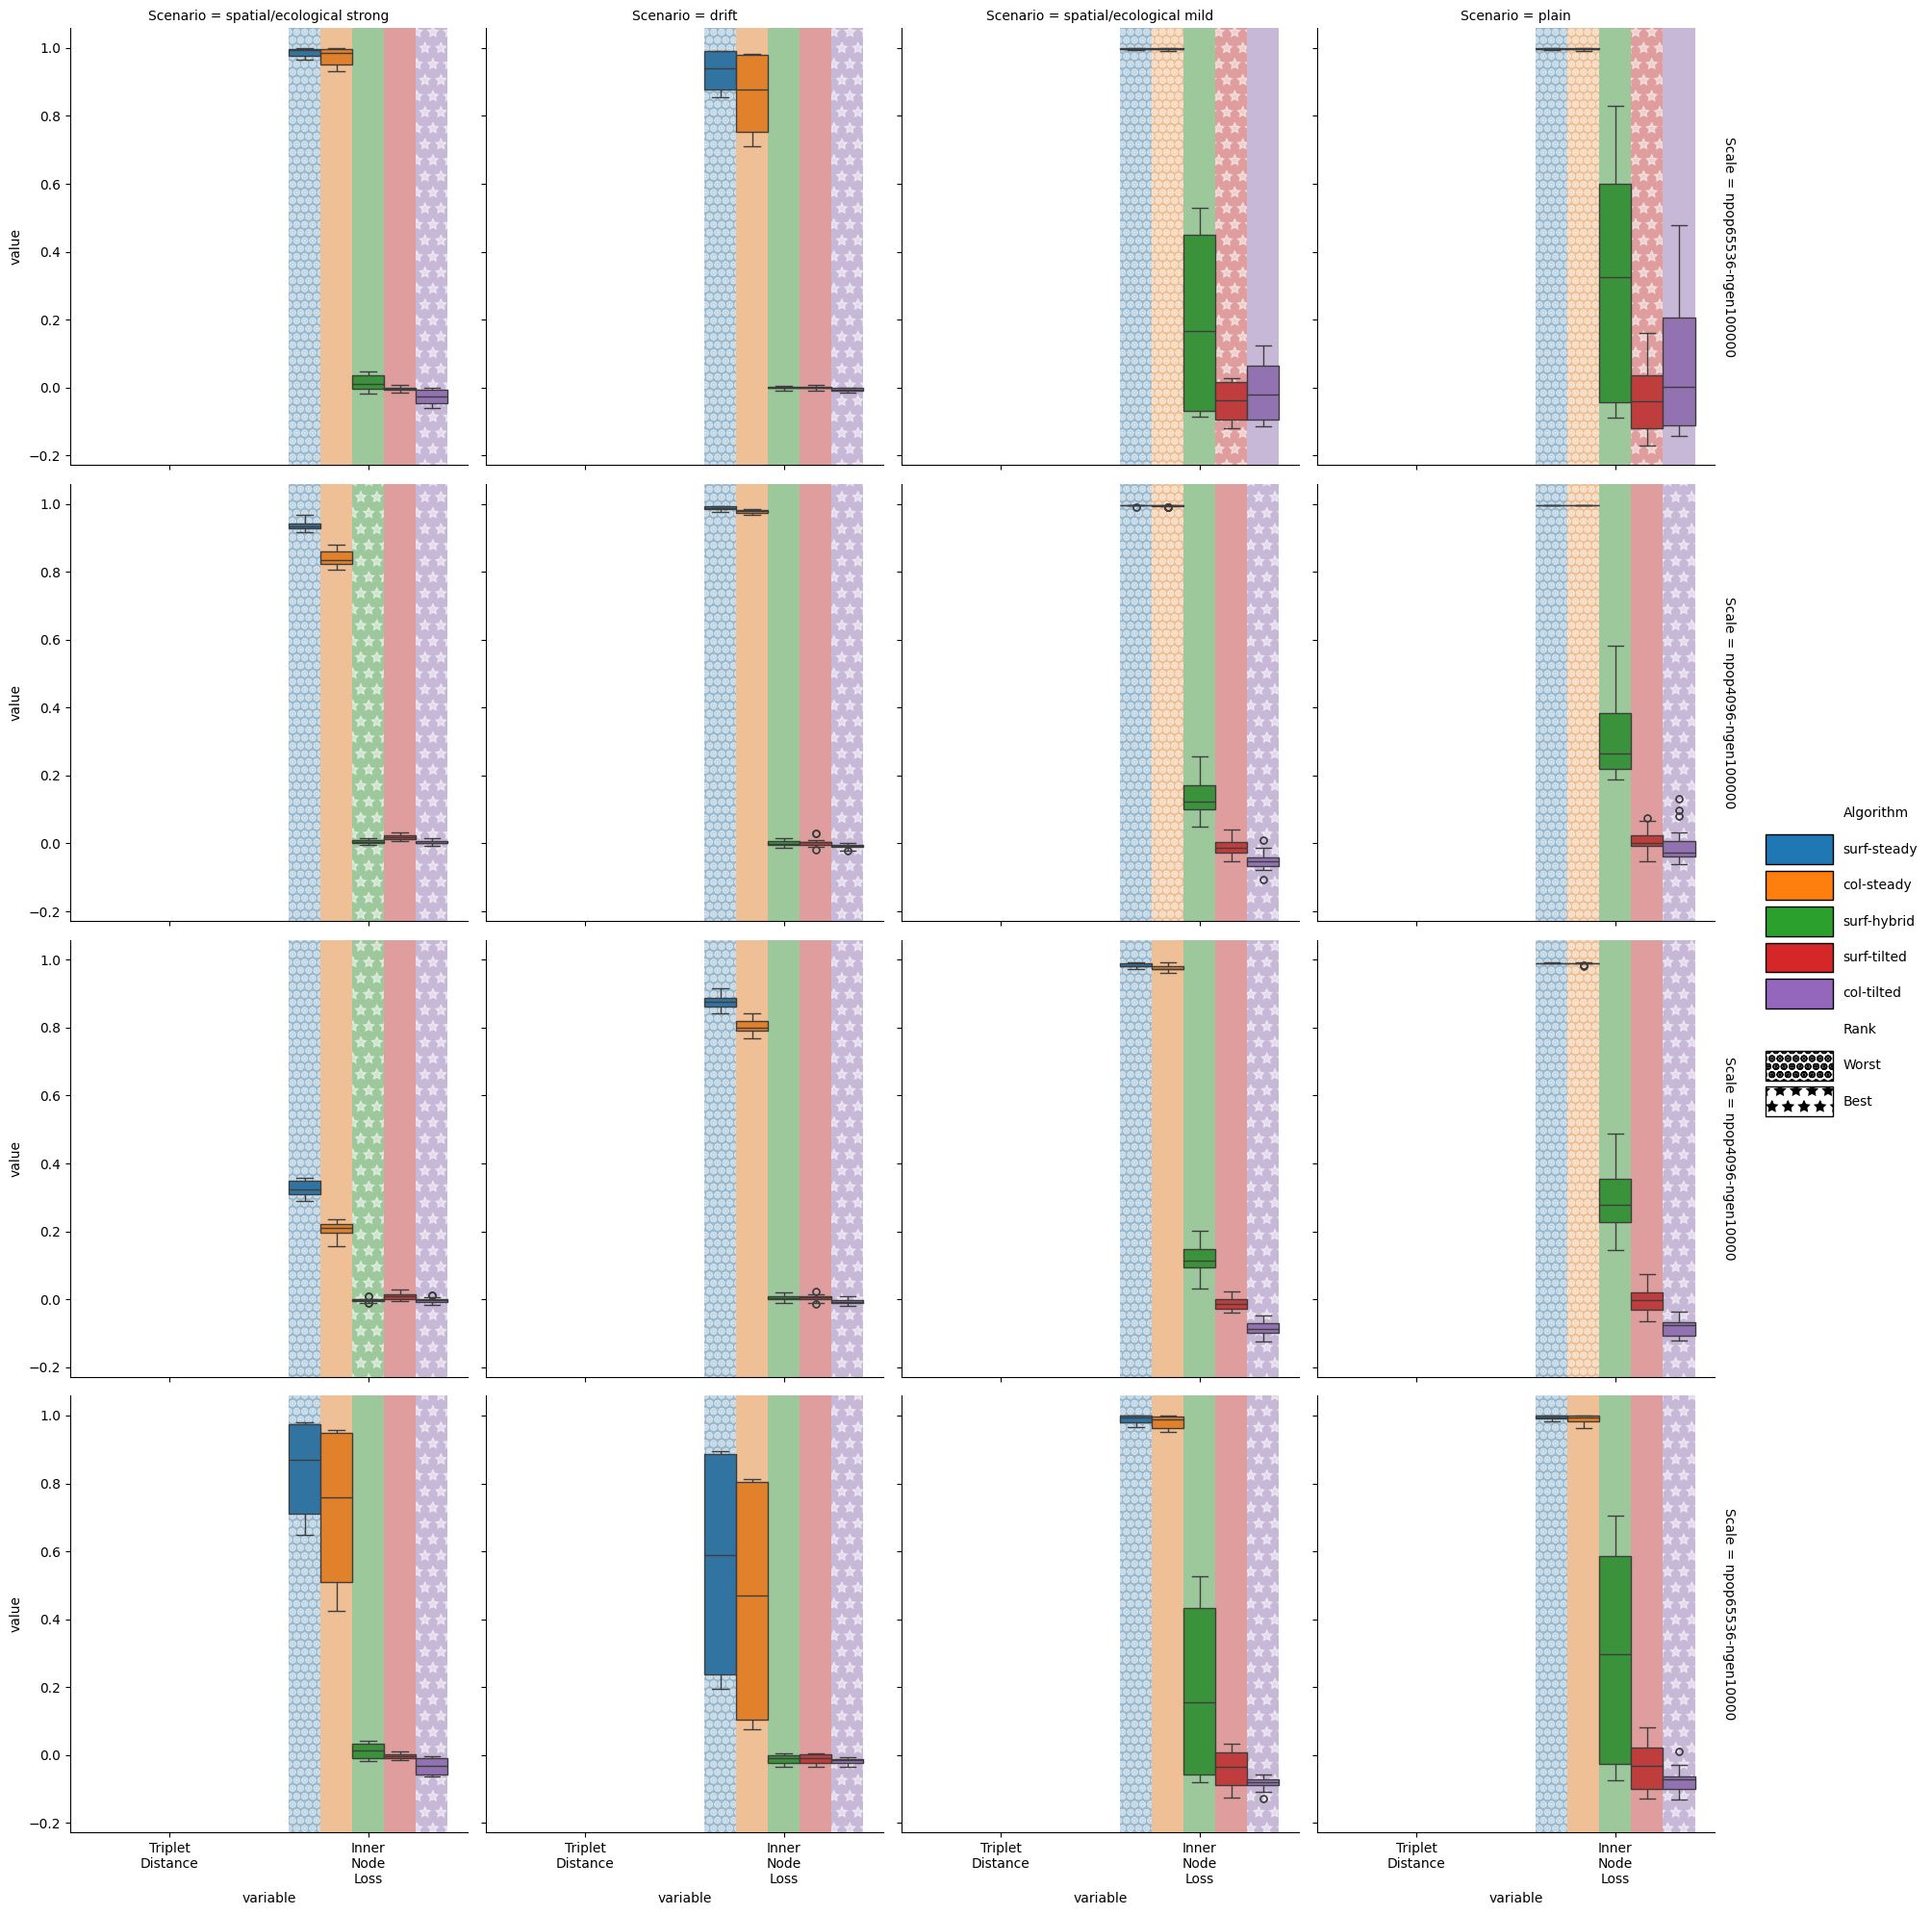

teeplots/a=focal+col=scenario+hue=algorithm+post=teed-figure-subplots-adjust-right-0-84+row=scale+score=value+sizebits=256+viz=peckplot+x=variable+x-group=outer+y=value+ext=.pdf


teeplots/a=focal+col=scenario+hue=algorithm+post=teed-figure-subplots-adjust-right-0-84+row=scale+score=value+sizebits=256+viz=peckplot+x=variable+x-group=outer+y=value+ext=.png


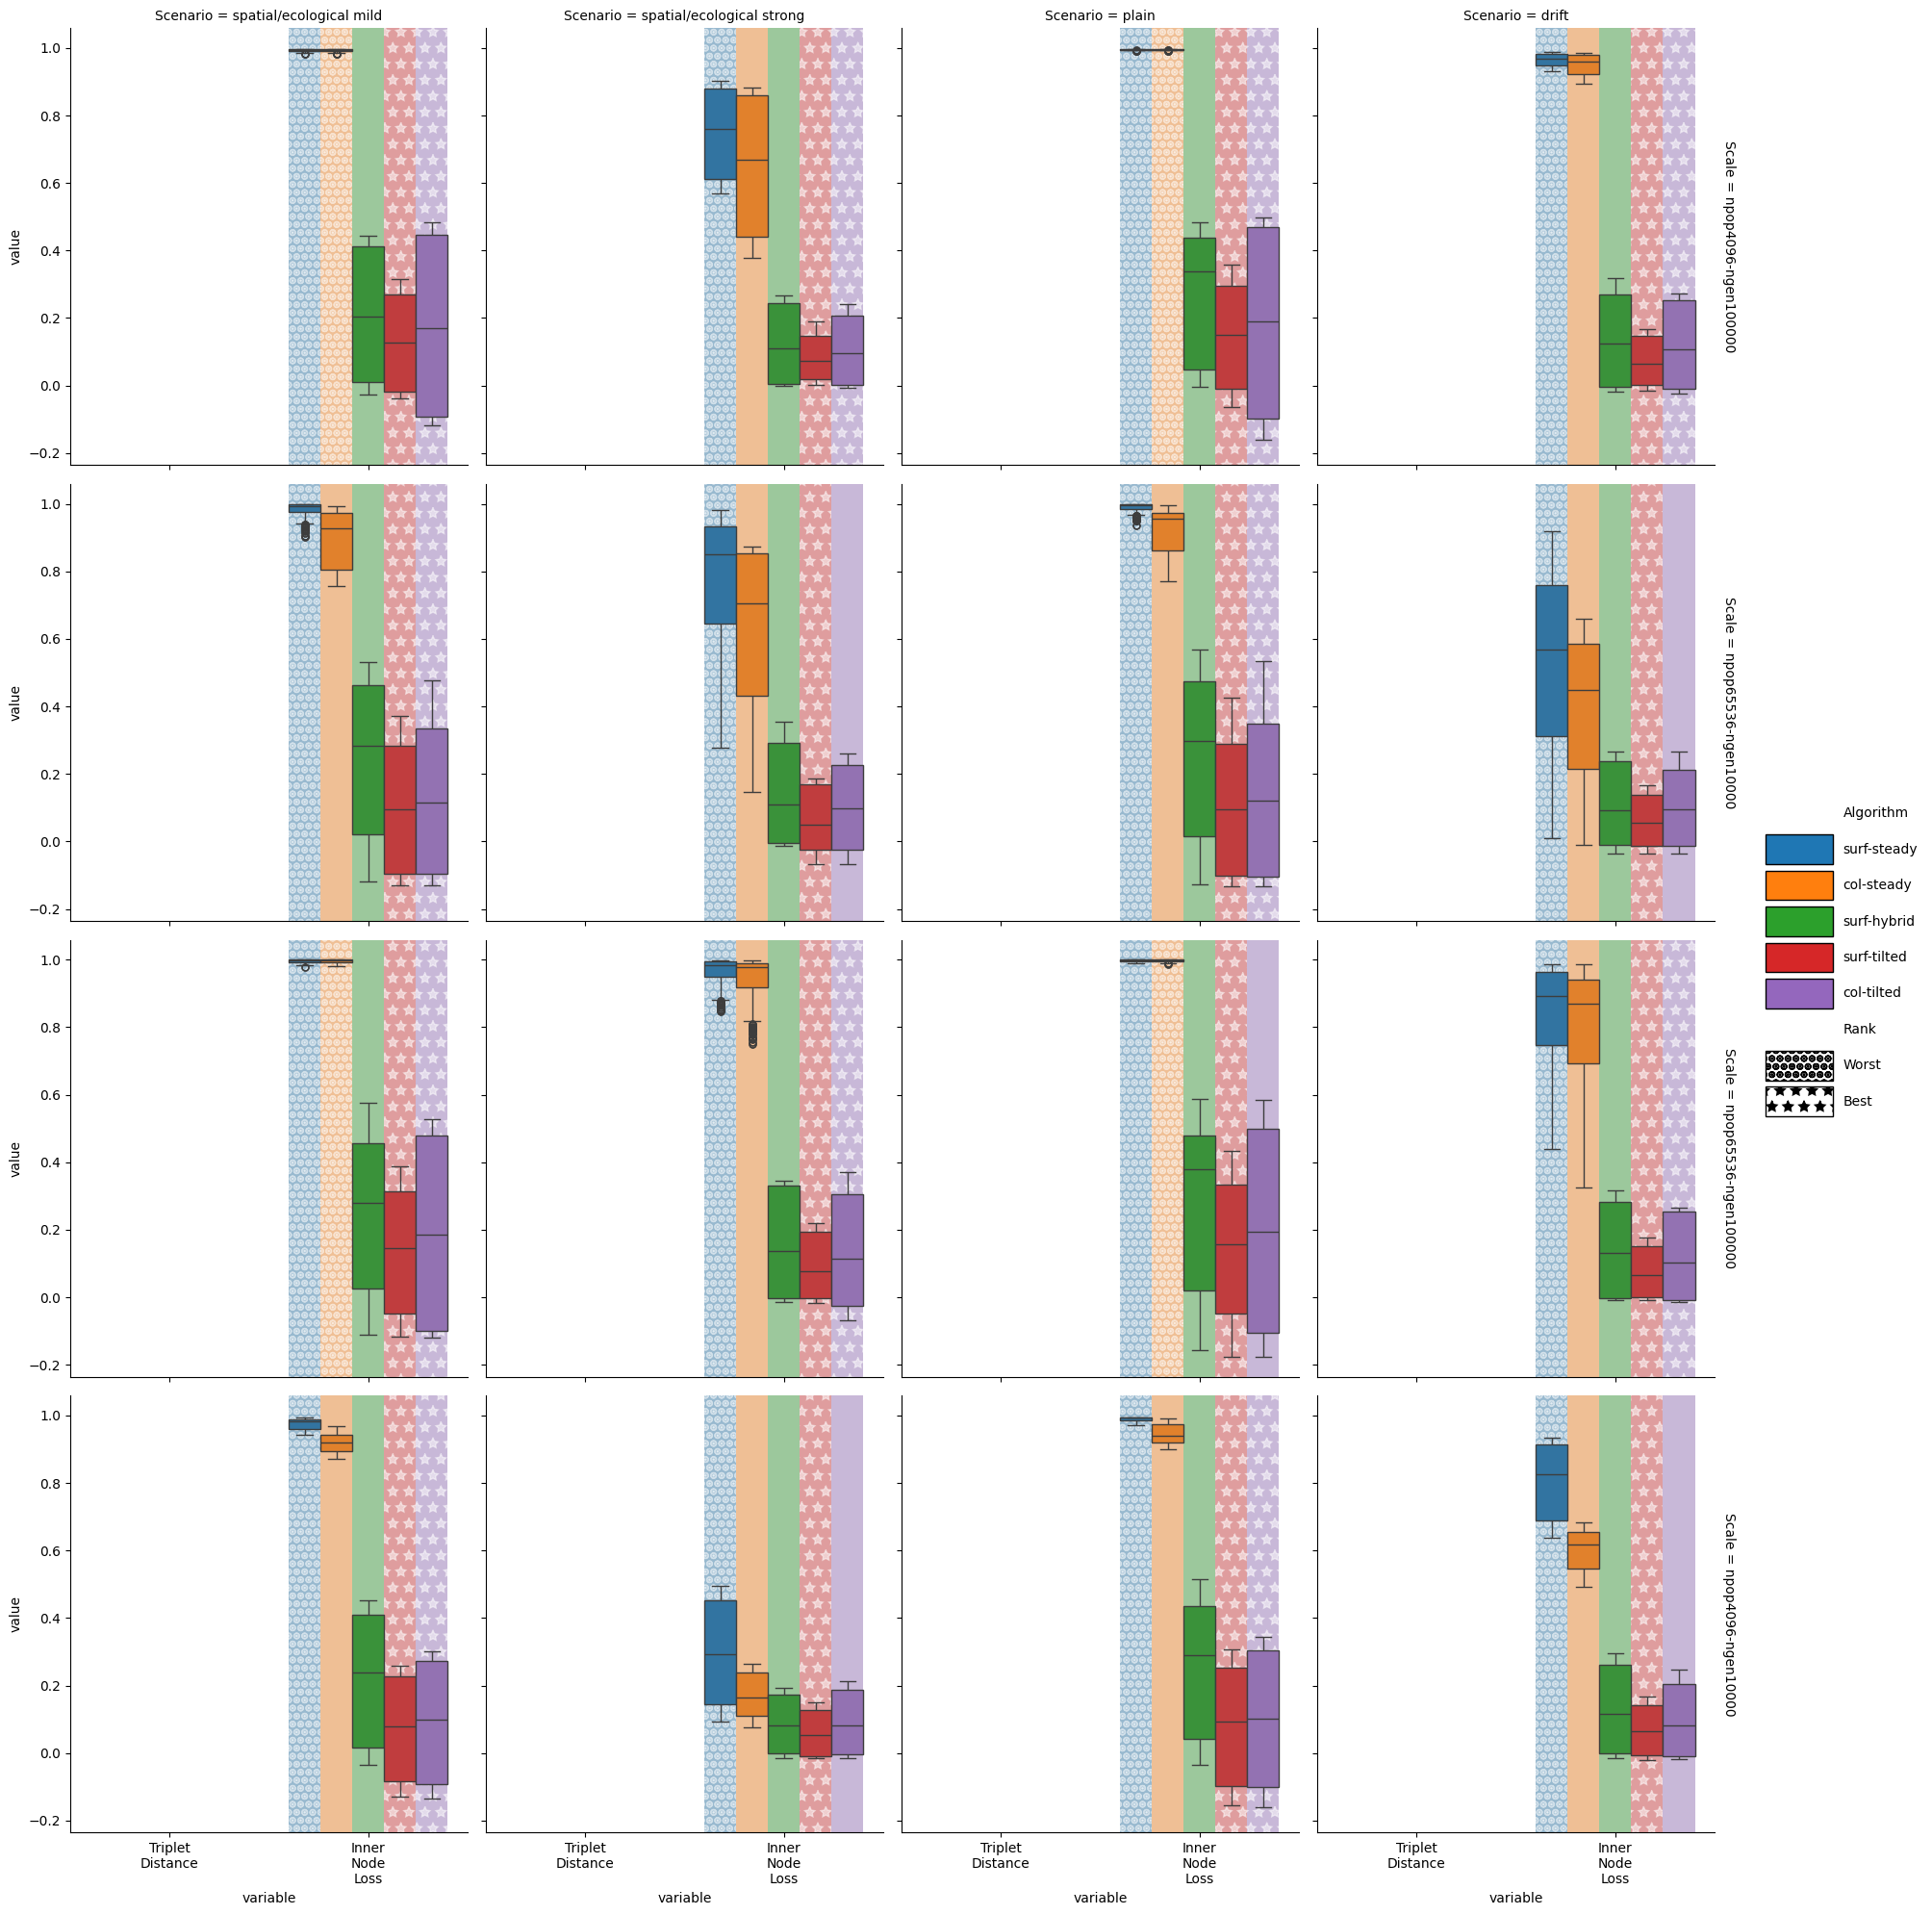

In [10]:
hue_order = [
    "surf-steady",
    "col-steady",
    "surf-hybrid",
    "surf-tilted",
    "col-tilted",
]


for sizebits, group in dfx.groupby("Annotation Size (bits)"):
    tp.tee(
        pecking.peckplot,
        data=group.reset_index(drop=True),
        score="value",
        x="variable",
        y="value",
        col="Scenario",
        row="Scale",
        hue="Algorithm",
        x_group="outer",
        order=["Triplet\nDistance", "Inner\nNode\nLoss"],
        hue_order=hue_order,
        skim_hatches=("..OO", "*"),
        skim_labels=("Worst", "Best"),
        # skimmers=[pecking.skim_highest],
        margin_titles=True,
        legend_width_inches=3,
        teeplot_outattrs={"a": "focal", "sizebits": sizebits},
        teeplot_postprocess="teed.figure.subplots_adjust(right=0.84)",
    )


## Visualize All Metrics

/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:87: UserWarning: Lowest ranked group and highest ranked group are indistinguishable by Mann-Whitney U test, in contradiction to Kruskal-Wallis test result p=0.026671197135708927.
  warnings.warn(


/home/runner/.local/lib/python3.10/site-packages/pecking/_peckplot.py:168: UserWarning: 4220 rows overlap between skimmers, with rows overlapped between at most 2 skimmers.
  warnings.warn(


teeplots/a=all+col=scenario+hue=algorithm+post=teed-figure-subplots-adjust-right-0-84+row=scale+score=value+sizebits=32+viz=peckplot+x=variable+x-group=outer+y=value+ext=.pdf


teeplots/a=all+col=scenario+hue=algorithm+post=teed-figure-subplots-adjust-right-0-84+row=scale+score=value+sizebits=32+viz=peckplot+x=variable+x-group=outer+y=value+ext=.png


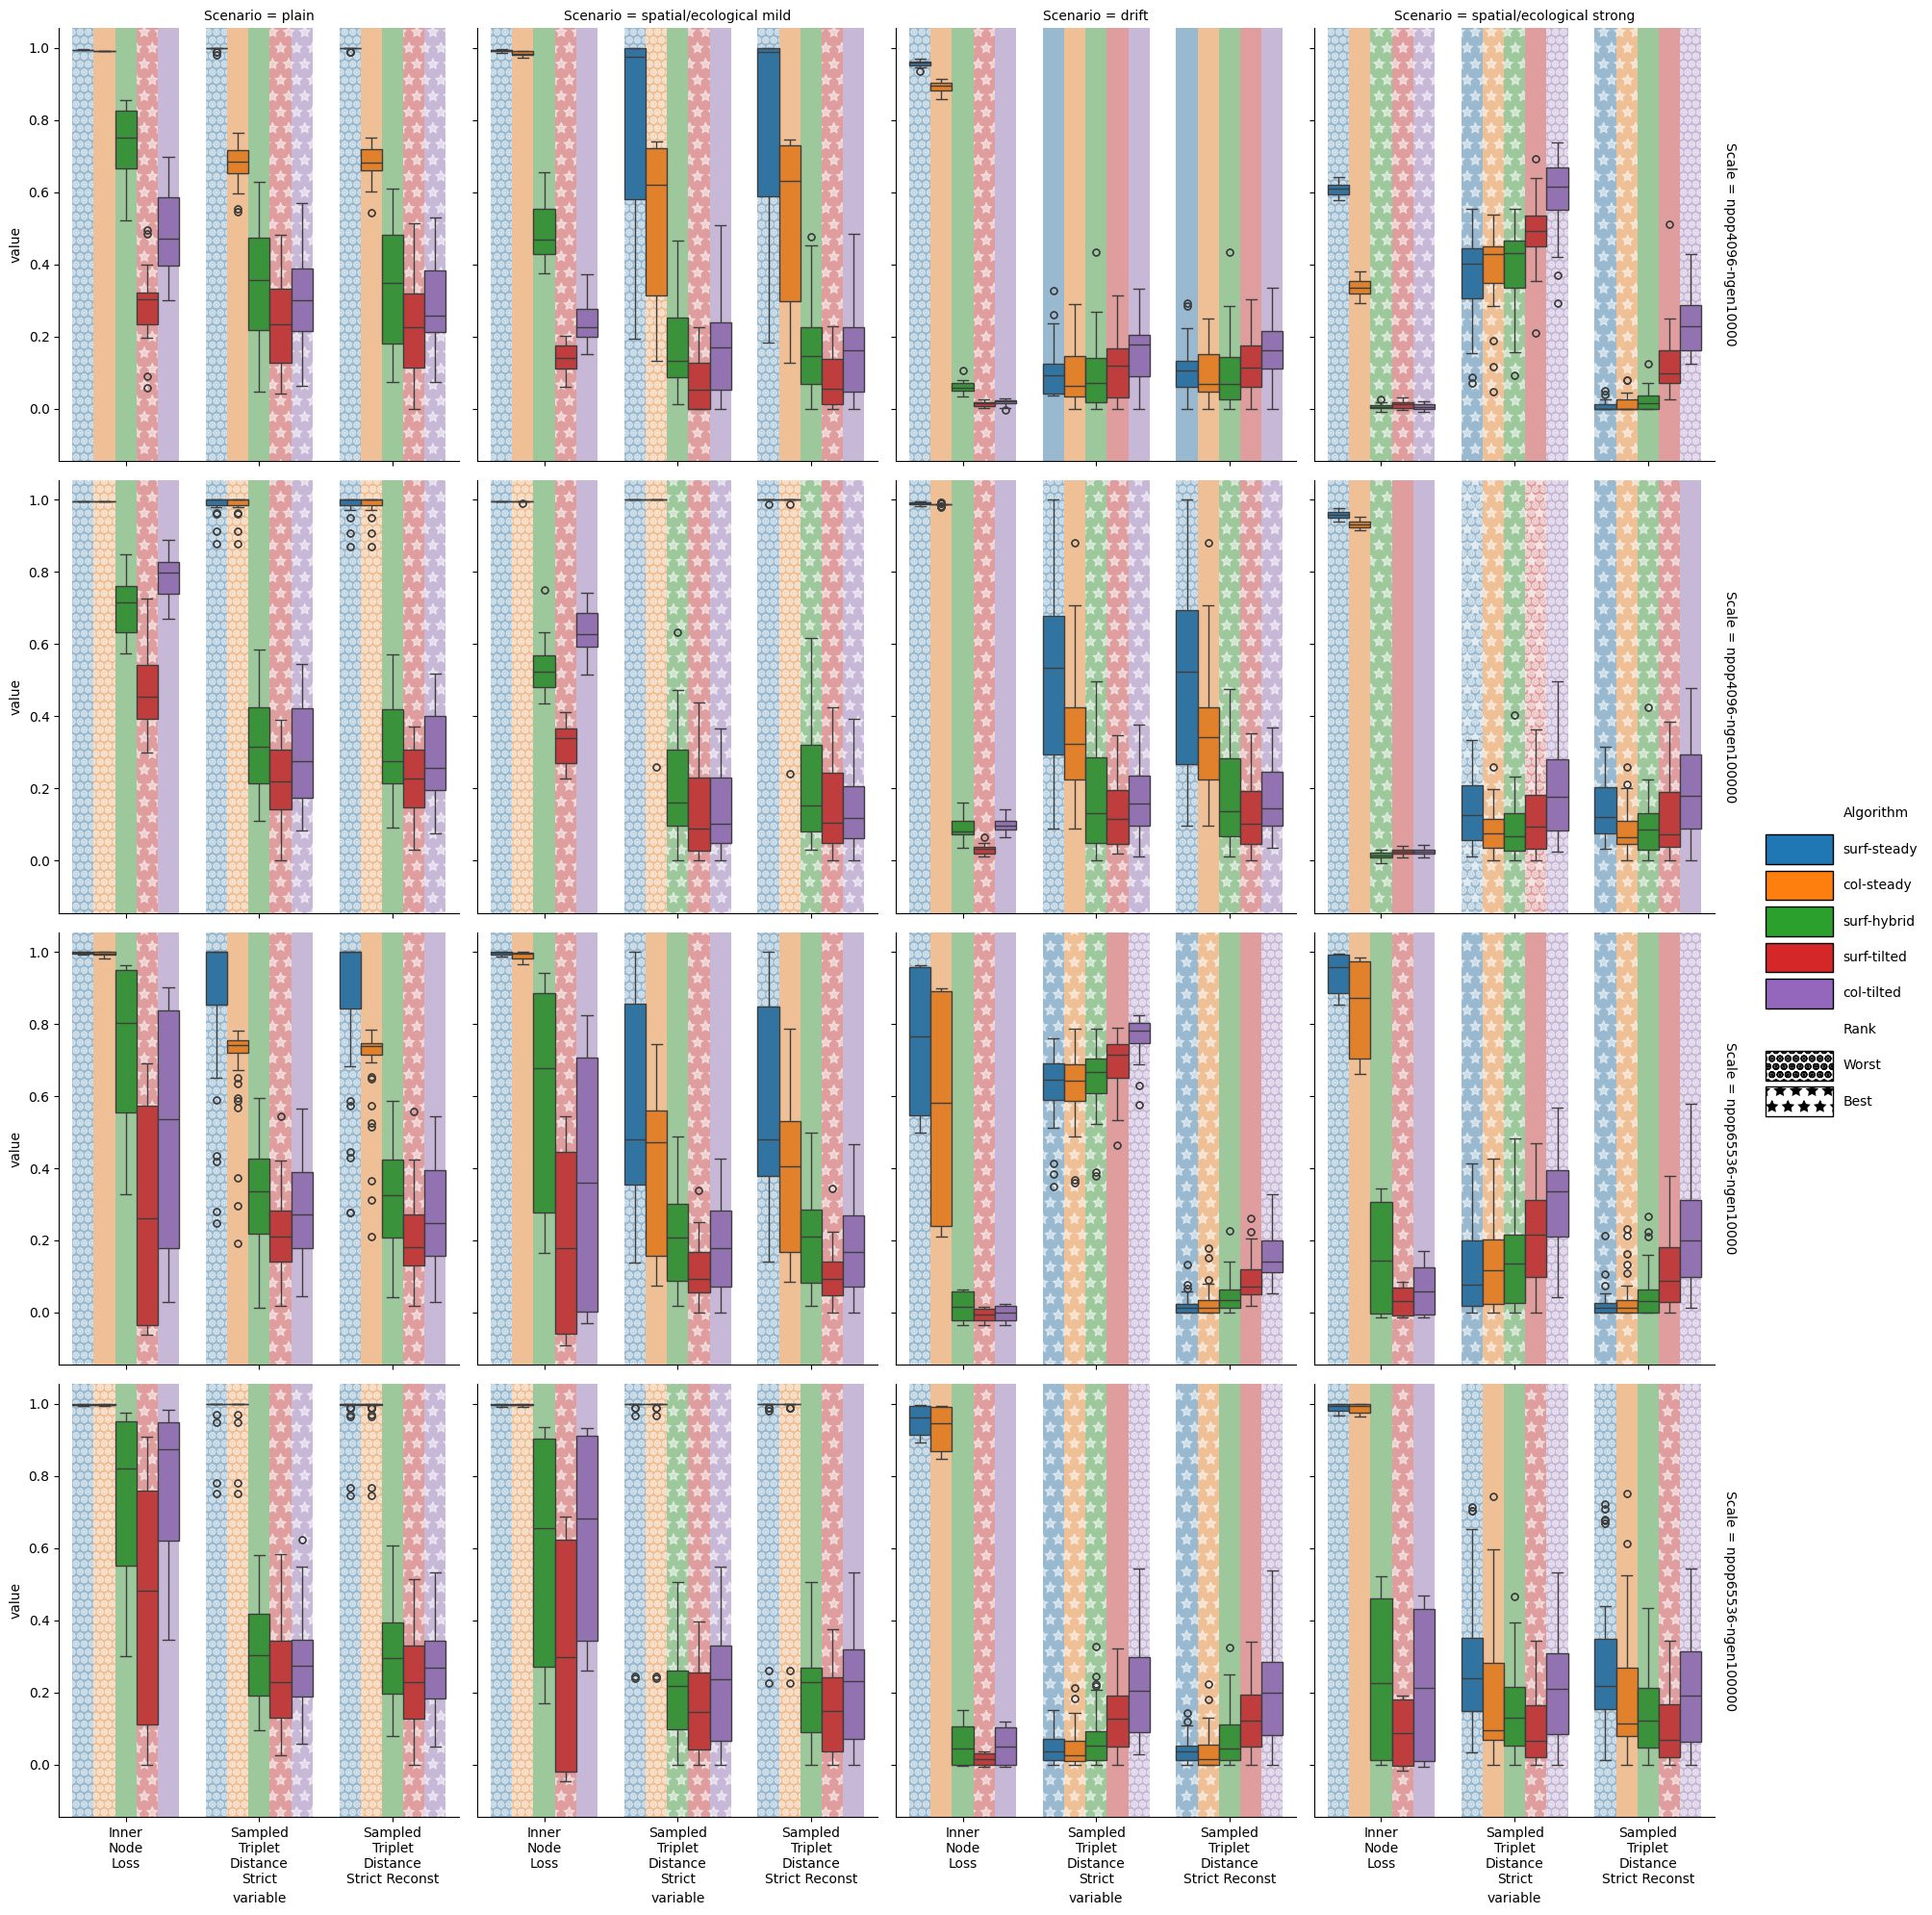

/home/runner/.local/lib/python3.10/site-packages/pecking/_peckplot.py:168: UserWarning: 4220 rows overlap between skimmers, with rows overlapped between at most 2 skimmers.
  warnings.warn(


teeplots/a=all+col=scenario+hue=algorithm+post=teed-figure-subplots-adjust-right-0-84+row=scale+score=value+sizebits=64+viz=peckplot+x=variable+x-group=outer+y=value+ext=.pdf


teeplots/a=all+col=scenario+hue=algorithm+post=teed-figure-subplots-adjust-right-0-84+row=scale+score=value+sizebits=64+viz=peckplot+x=variable+x-group=outer+y=value+ext=.png


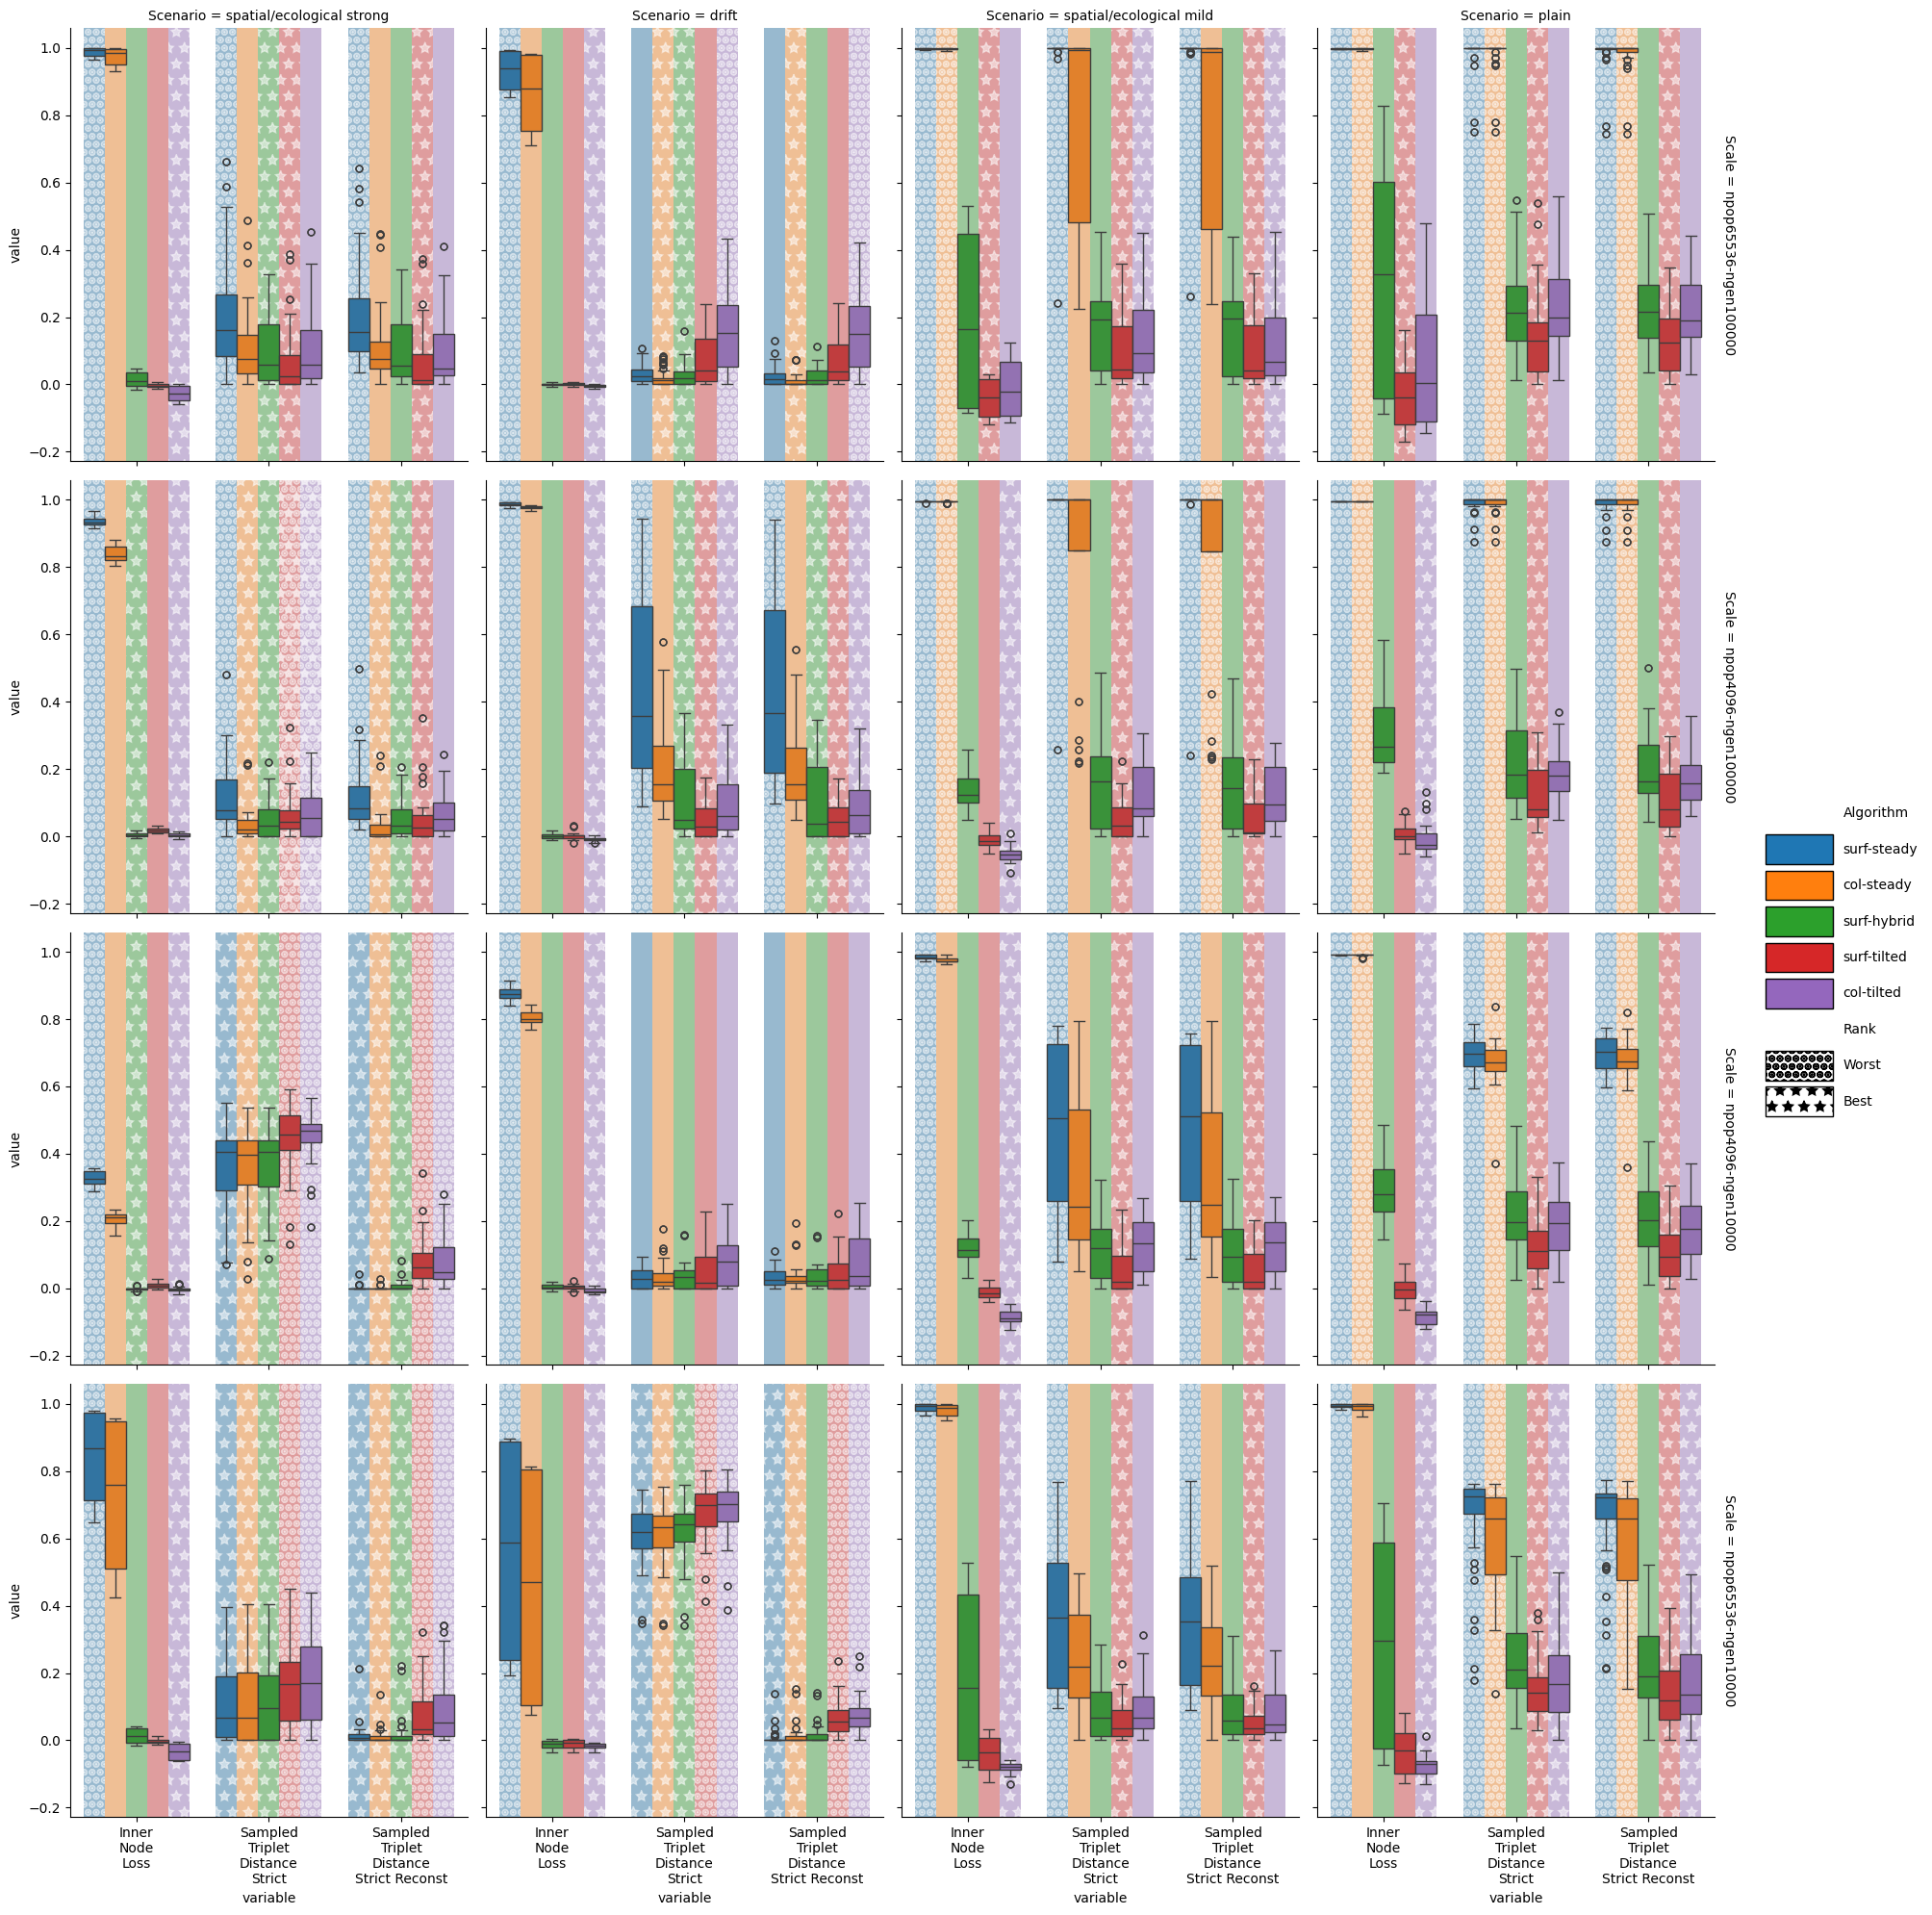

/home/runner/.local/lib/python3.10/site-packages/pecking/_peckplot.py:168: UserWarning: 9160 rows overlap between skimmers, with rows overlapped between at most 2 skimmers.
  warnings.warn(


teeplots/a=all+col=scenario+hue=algorithm+post=teed-figure-subplots-adjust-right-0-84+row=scale+score=value+sizebits=256+viz=peckplot+x=variable+x-group=outer+y=value+ext=.pdf


teeplots/a=all+col=scenario+hue=algorithm+post=teed-figure-subplots-adjust-right-0-84+row=scale+score=value+sizebits=256+viz=peckplot+x=variable+x-group=outer+y=value+ext=.png


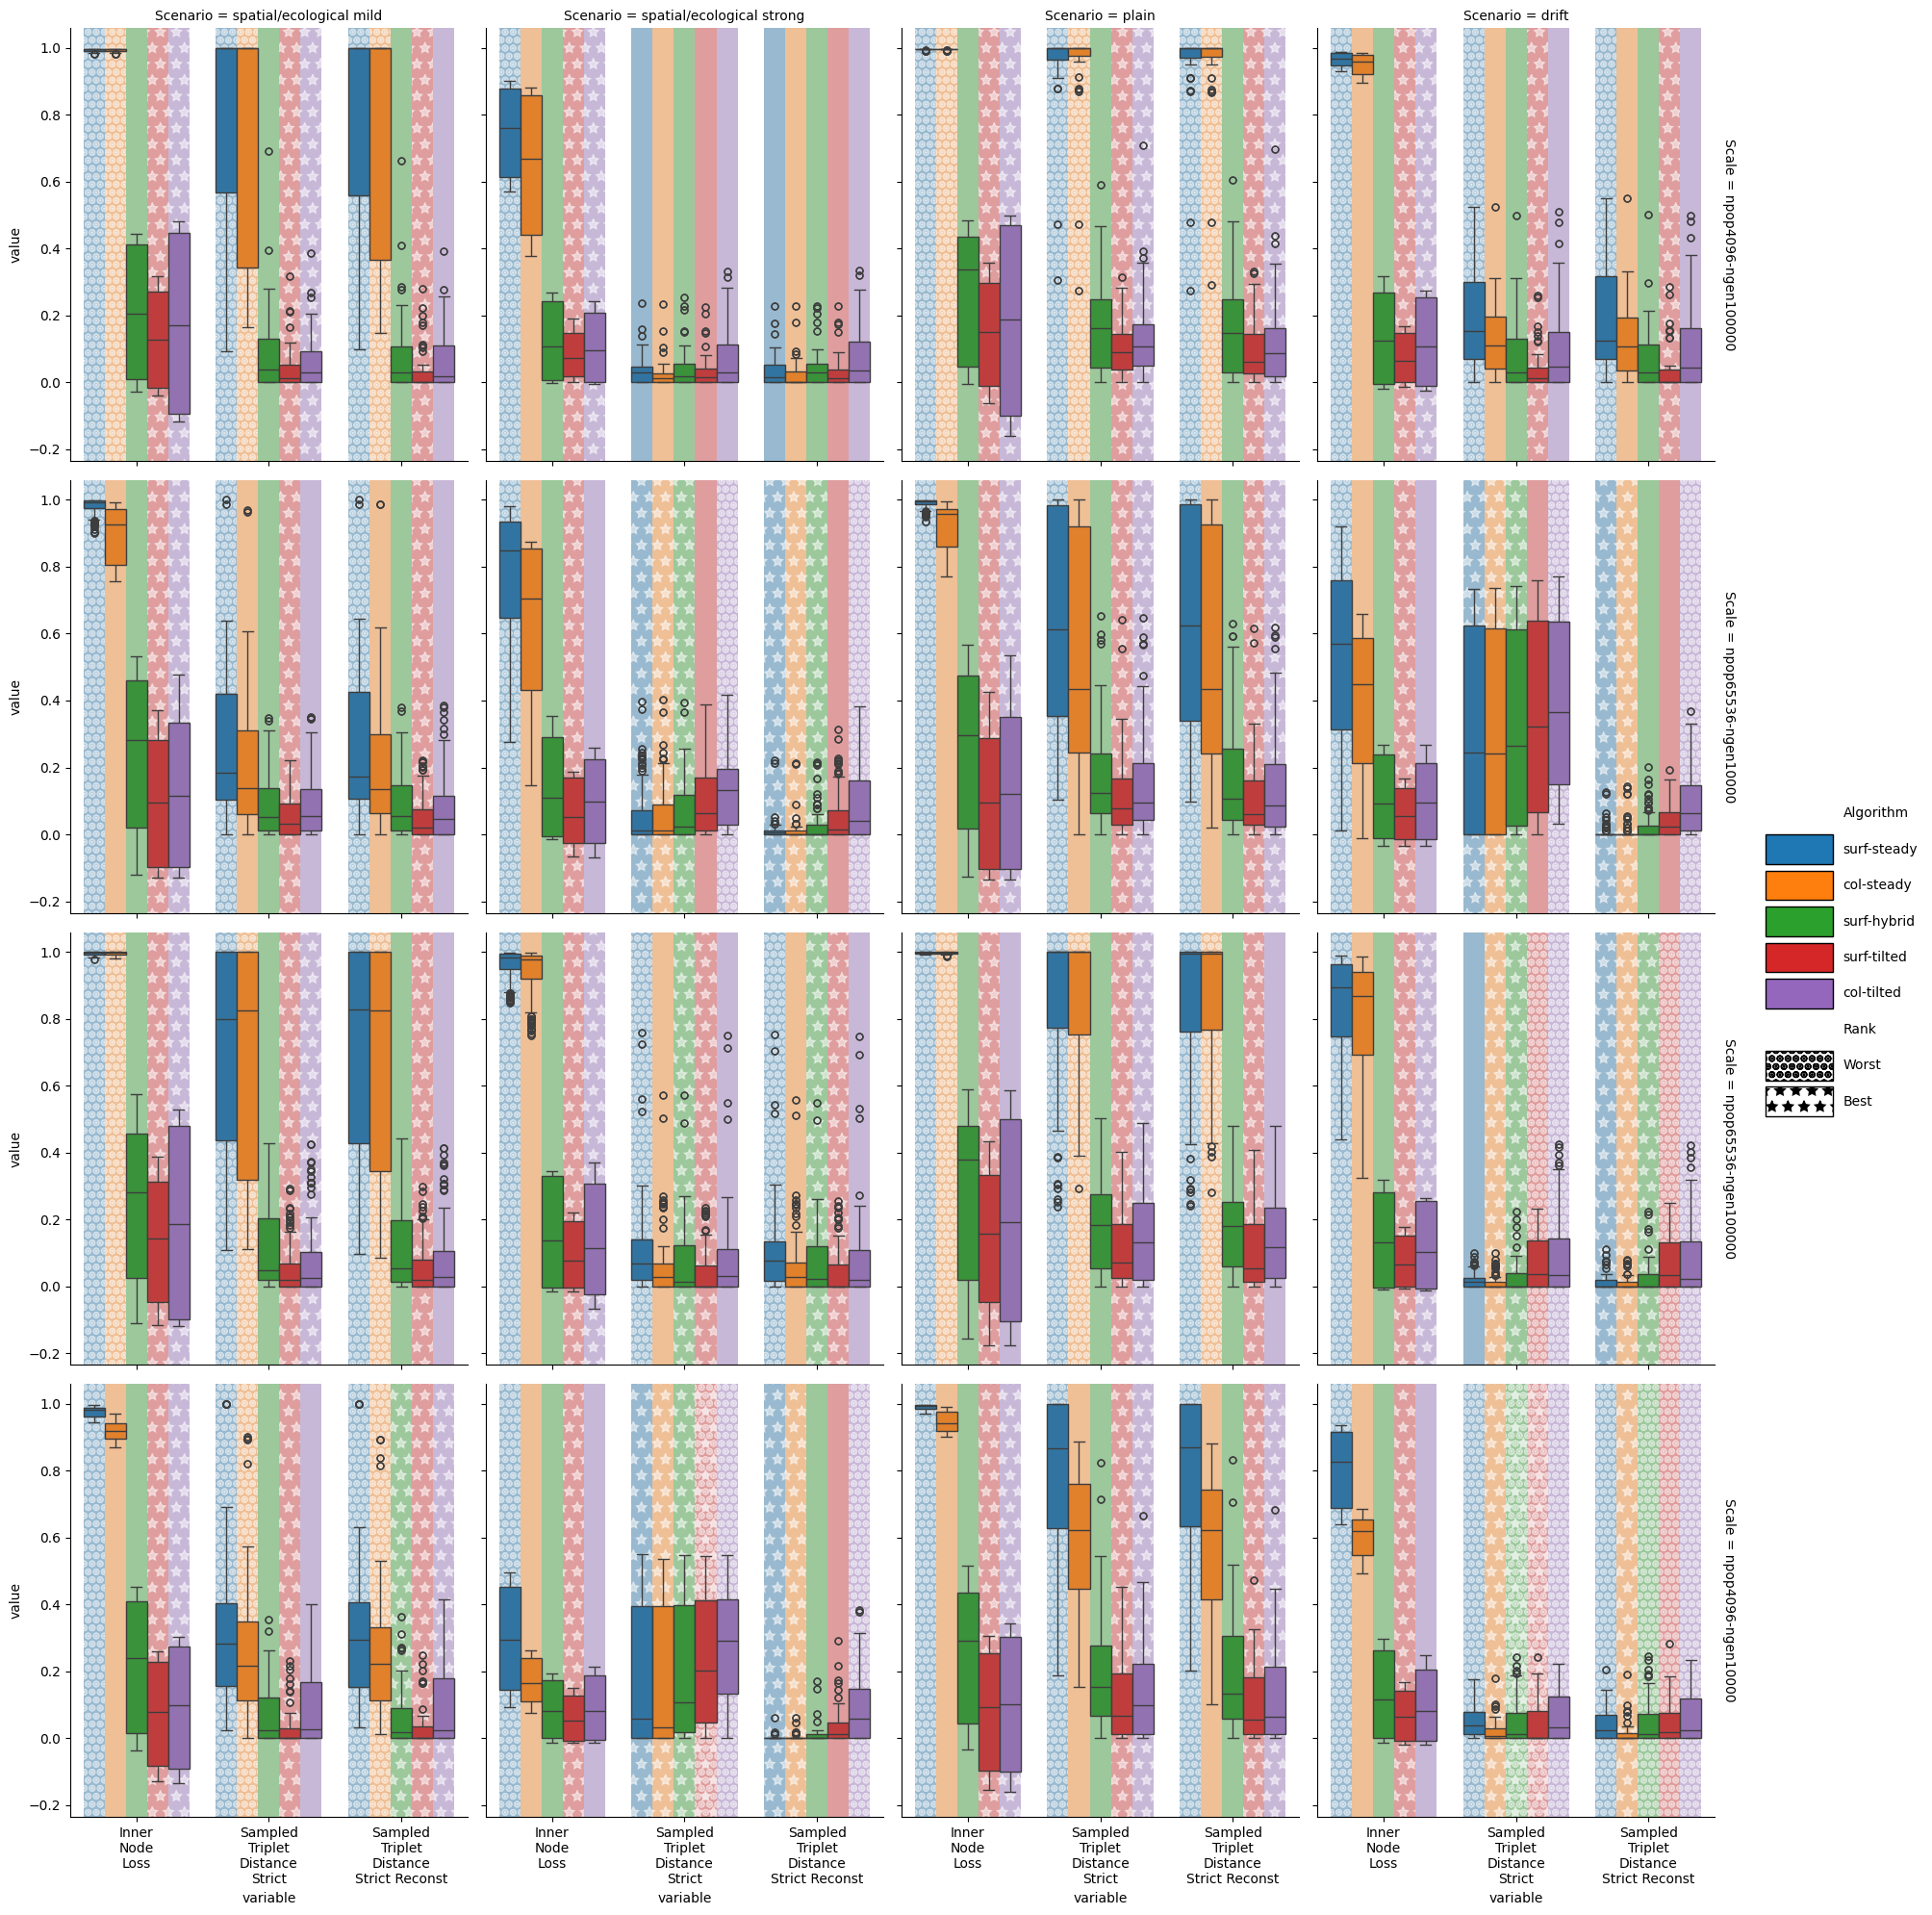

In [11]:
hue_order = [
    "surf-steady",
    "col-steady",
    "surf-hybrid",
    "surf-tilted",
    "col-tilted",
]


for sizebits, group in dfx.groupby("Annotation Size (bits)"):
    tp.tee(
        pecking.peckplot,
        data=group.reset_index(drop=True),
        score="value",
        x="variable",
        y="value",
        col="Scenario",
        row="Scale",
        hue="Algorithm",
        x_group="outer",
        hue_order=hue_order,
        skim_hatches=("..OO", "*"),
        skim_labels=("Worst", "Best"),
        margin_titles=True,
        legend_width_inches=3,
        teeplot_outattrs={"a": "all", "sizebits": sizebits},
        teeplot_postprocess="teed.figure.subplots_adjust(right=0.84)",
    )


## Comparison Between Population Sizes


teeplots/a=all+col=scenario+diffwidth=1+dsamp=500+hue=scale+hue-group=inner+post=teed-figure-subplots-adjust-right-0-84+row=variable+score=value+sizebits=32+viz=peckplot+x=algorithm+x-group=outer+y=value+y-gro.../up=ignore+ext=.pdf


teeplots/a=all+col=scenario+diffwidth=1+dsamp=500+hue=scale+hue-group=inner+post=teed-figure-subplots-adjust-right-0-84+row=variable+score=value+sizebits=32+viz=peckplot+x=algorithm+x-group=outer+y=value+y-gro.../up=ignore+ext=.png


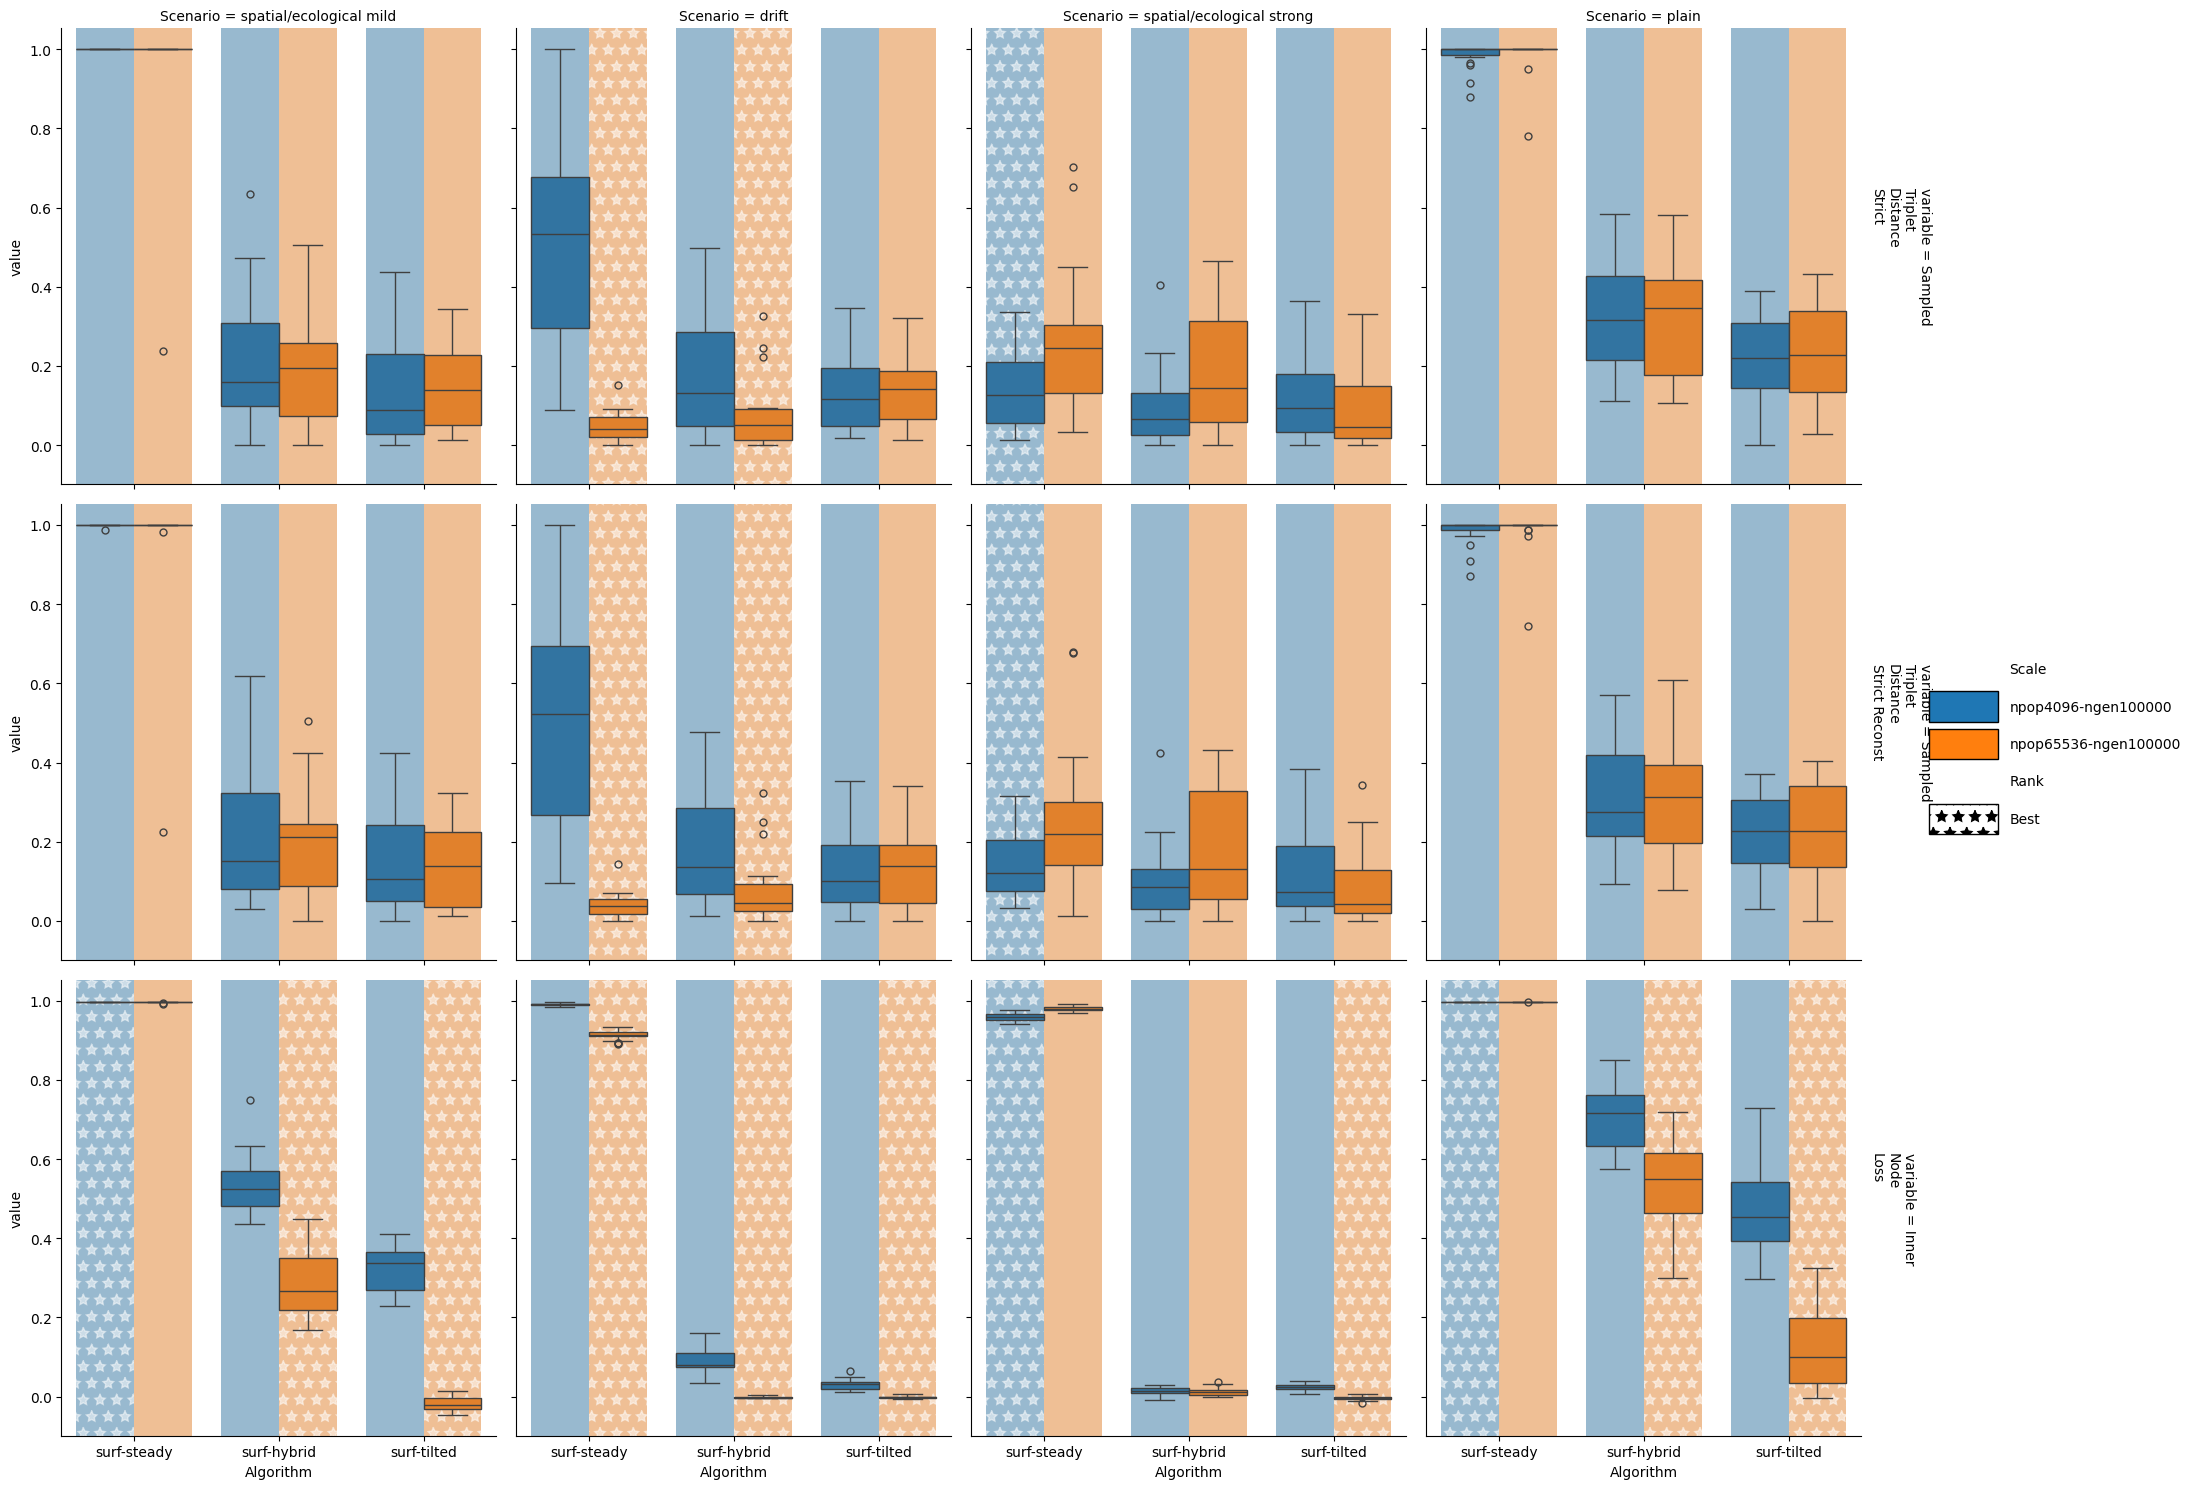

/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `At least two samples are required.` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `At least two samples are required.` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `At least two samples are required.` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `At least two samples are required.` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py

teeplots/a=all+col=scenario+diffwidth=1+dsamp=8000+hue=scale+hue-group=inner+post=teed-figure-subplots-adjust-right-0-84+row=variable+score=value+sizebits=32+viz=peckplot+x=algorithm+x-group=outer+y=value+y-gr.../oup=ignore+ext=.pdf


teeplots/a=all+col=scenario+diffwidth=1+dsamp=8000+hue=scale+hue-group=inner+post=teed-figure-subplots-adjust-right-0-84+row=variable+score=value+sizebits=32+viz=peckplot+x=algorithm+x-group=outer+y=value+y-gr.../oup=ignore+ext=.png


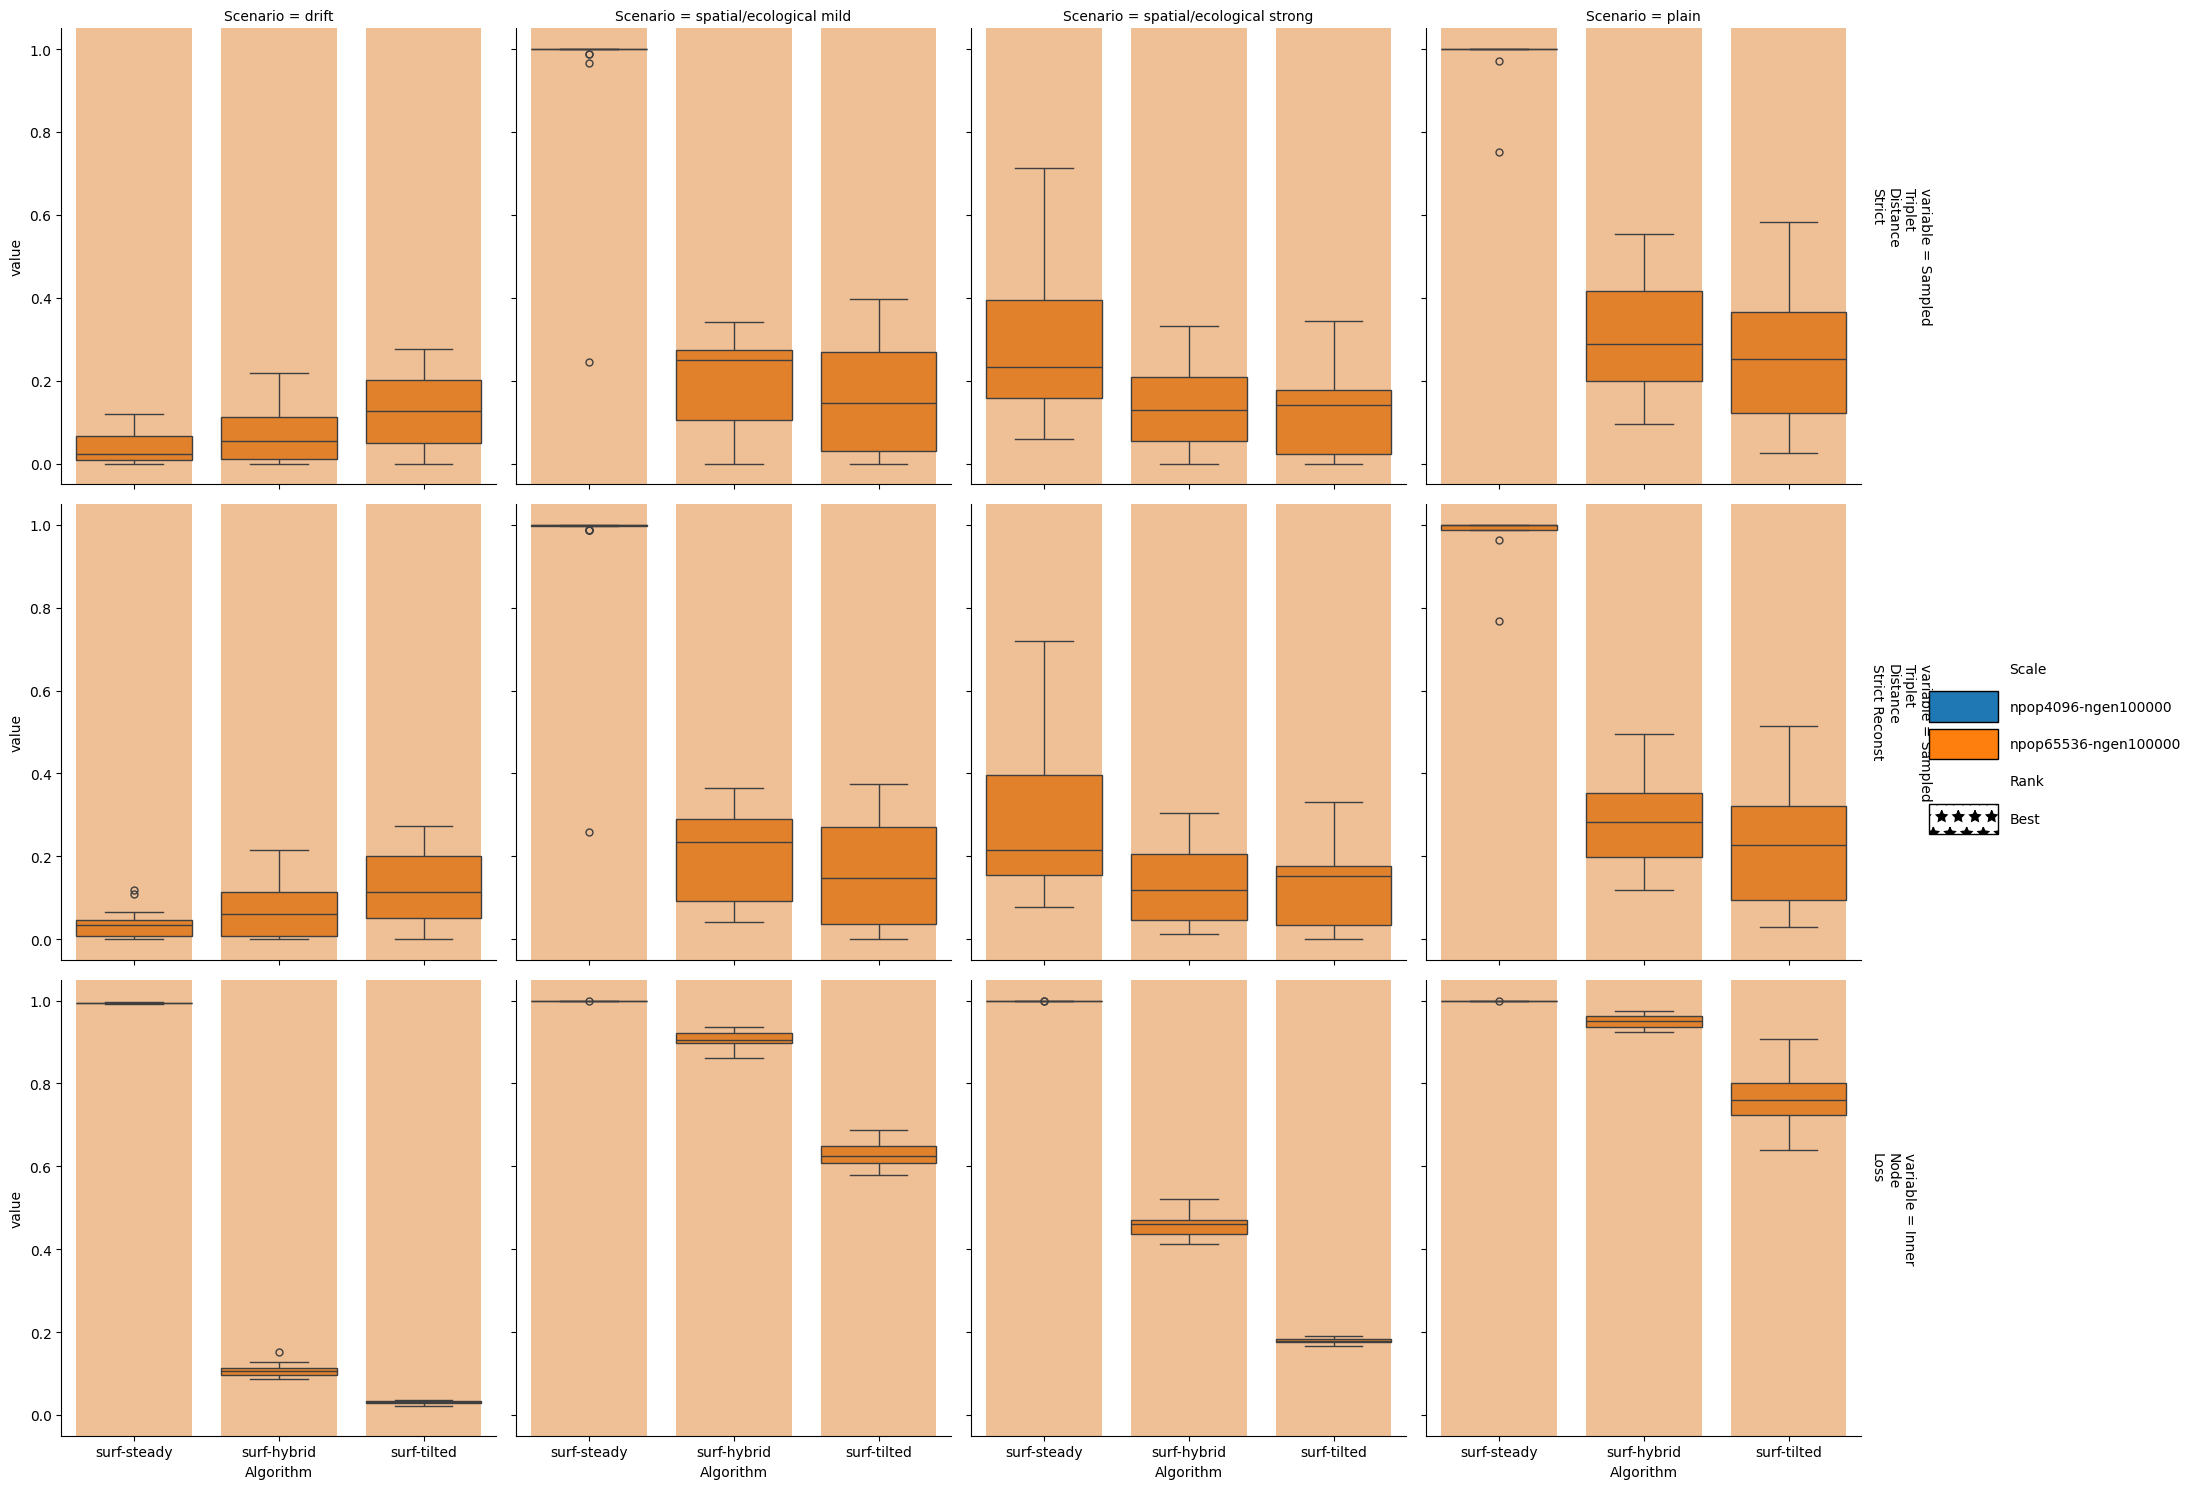

teeplots/a=all+col=scenario+diffwidth=1+dsamp=500+hue=scale+hue-group=inner+post=teed-figure-subplots-adjust-right-0-84+row=variable+score=value+sizebits=64+viz=peckplot+x=algorithm+x-group=outer+y=value+y-gro.../up=ignore+ext=.pdf


teeplots/a=all+col=scenario+diffwidth=1+dsamp=500+hue=scale+hue-group=inner+post=teed-figure-subplots-adjust-right-0-84+row=variable+score=value+sizebits=64+viz=peckplot+x=algorithm+x-group=outer+y=value+y-gro.../up=ignore+ext=.png


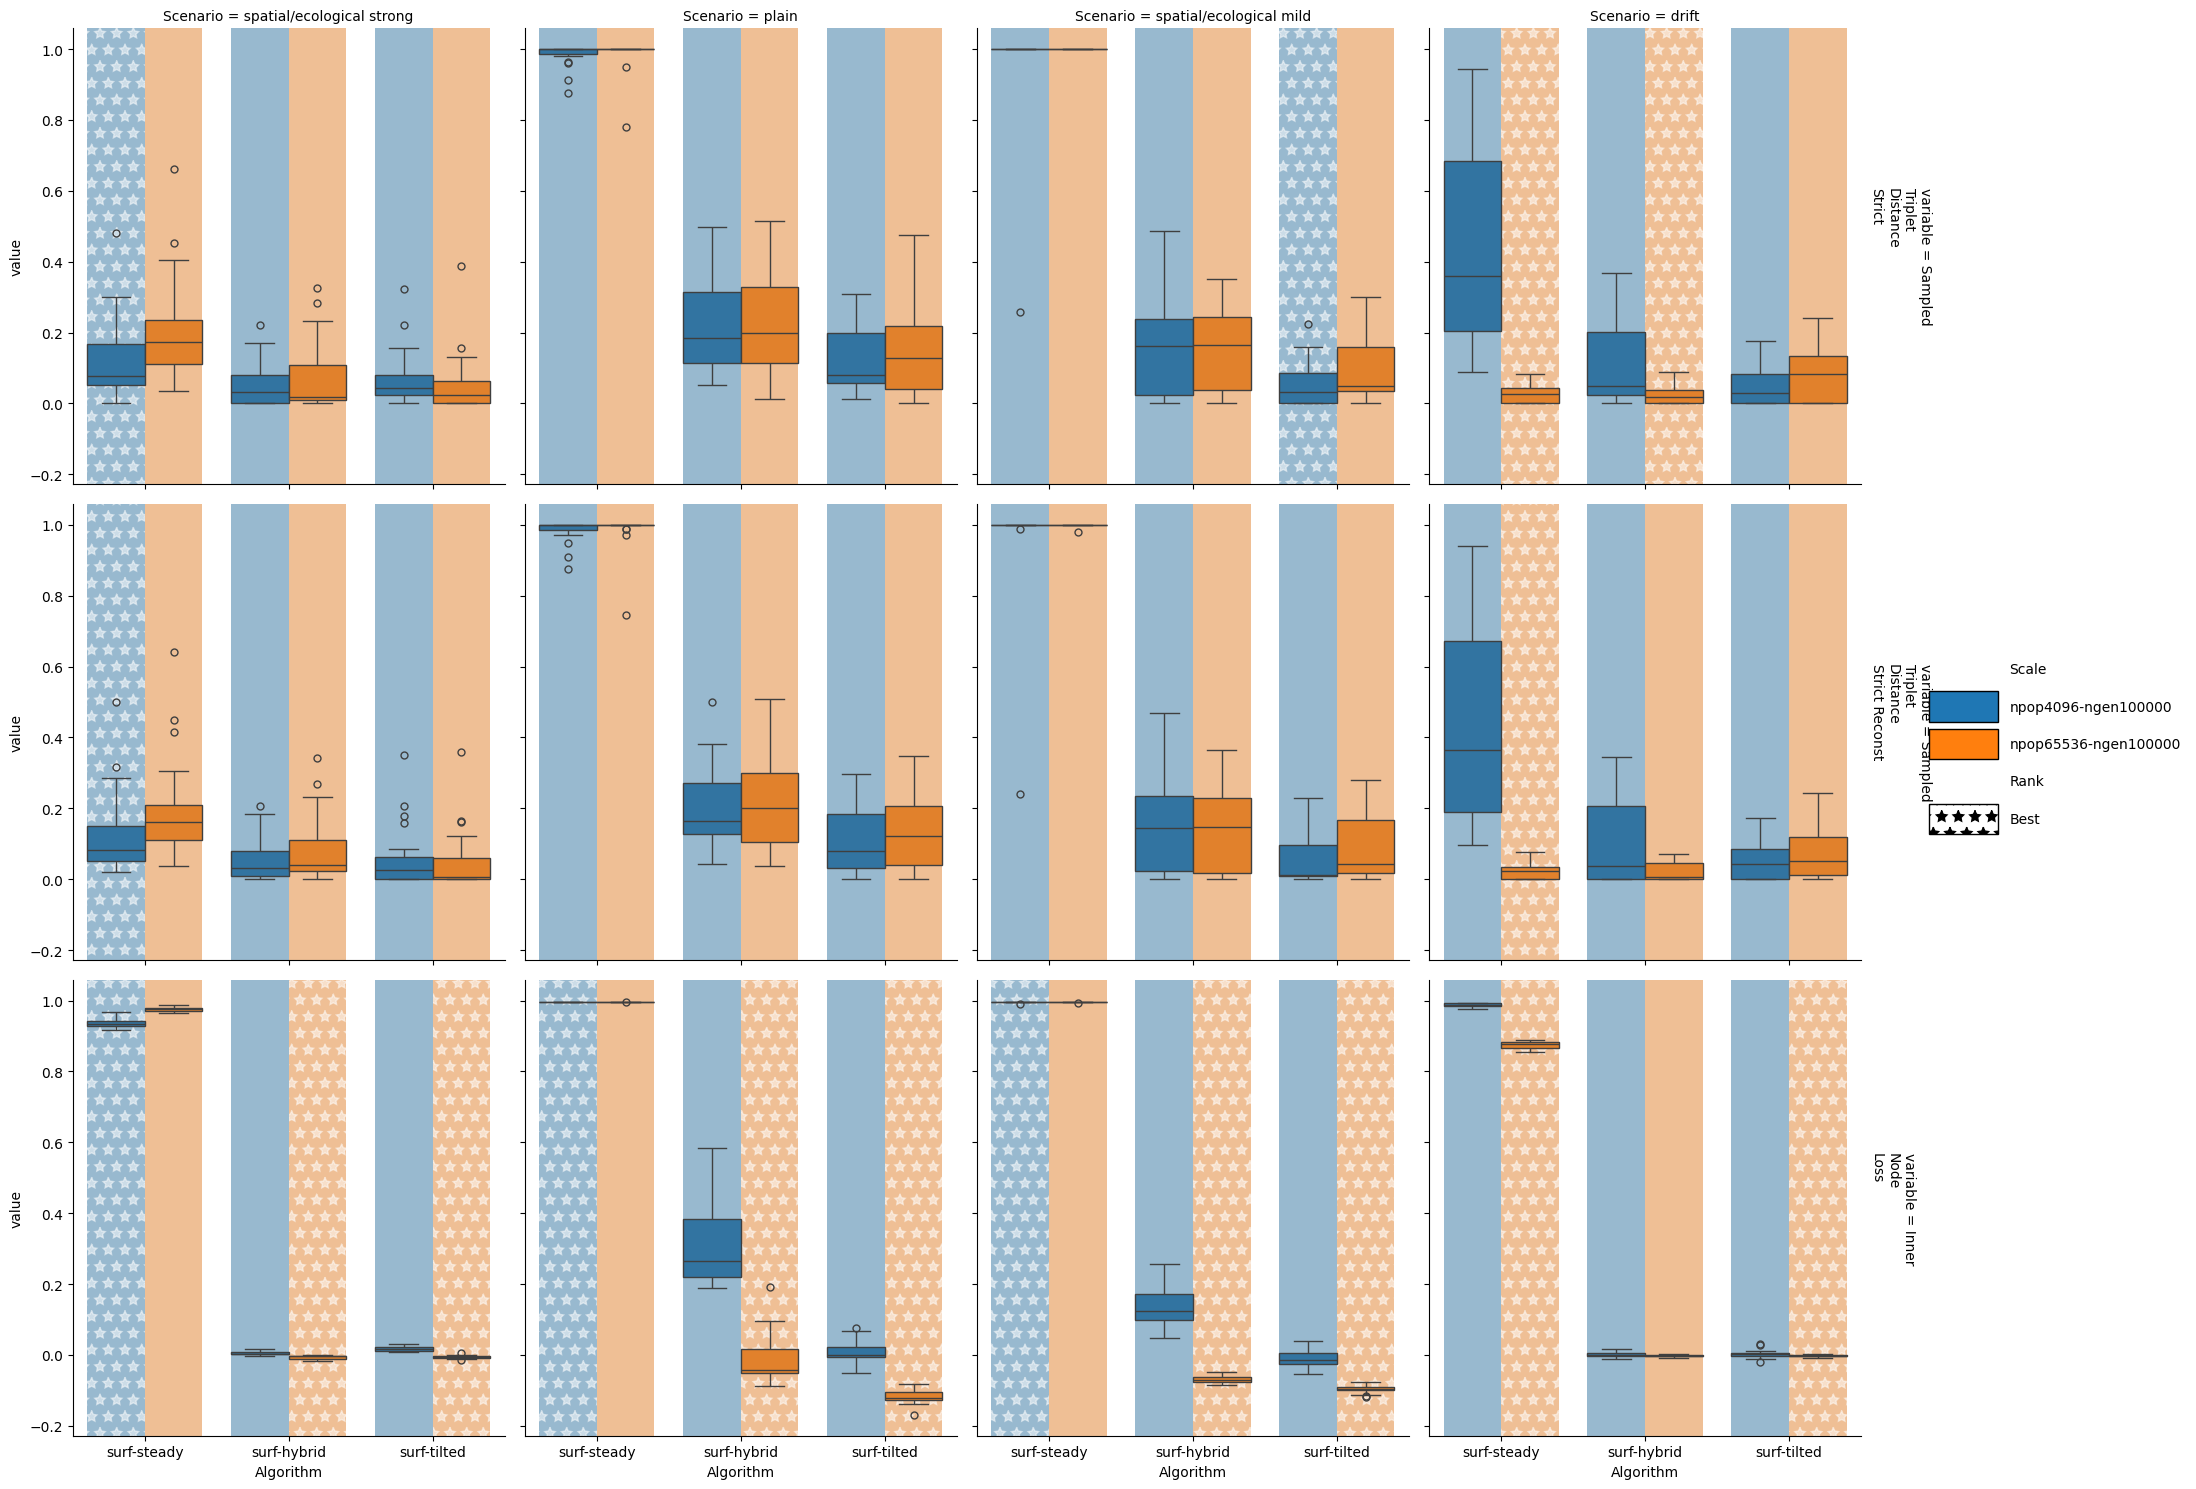

/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `At least two samples are required.` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `At least two samples are required.` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `At least two samples are required.` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `At least two samples are required.` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py

teeplots/a=all+col=scenario+diffwidth=1+dsamp=8000+hue=scale+hue-group=inner+post=teed-figure-subplots-adjust-right-0-84+row=variable+score=value+sizebits=64+viz=peckplot+x=algorithm+x-group=outer+y=value+y-gr.../oup=ignore+ext=.pdf


teeplots/a=all+col=scenario+diffwidth=1+dsamp=8000+hue=scale+hue-group=inner+post=teed-figure-subplots-adjust-right-0-84+row=variable+score=value+sizebits=64+viz=peckplot+x=algorithm+x-group=outer+y=value+y-gr.../oup=ignore+ext=.png


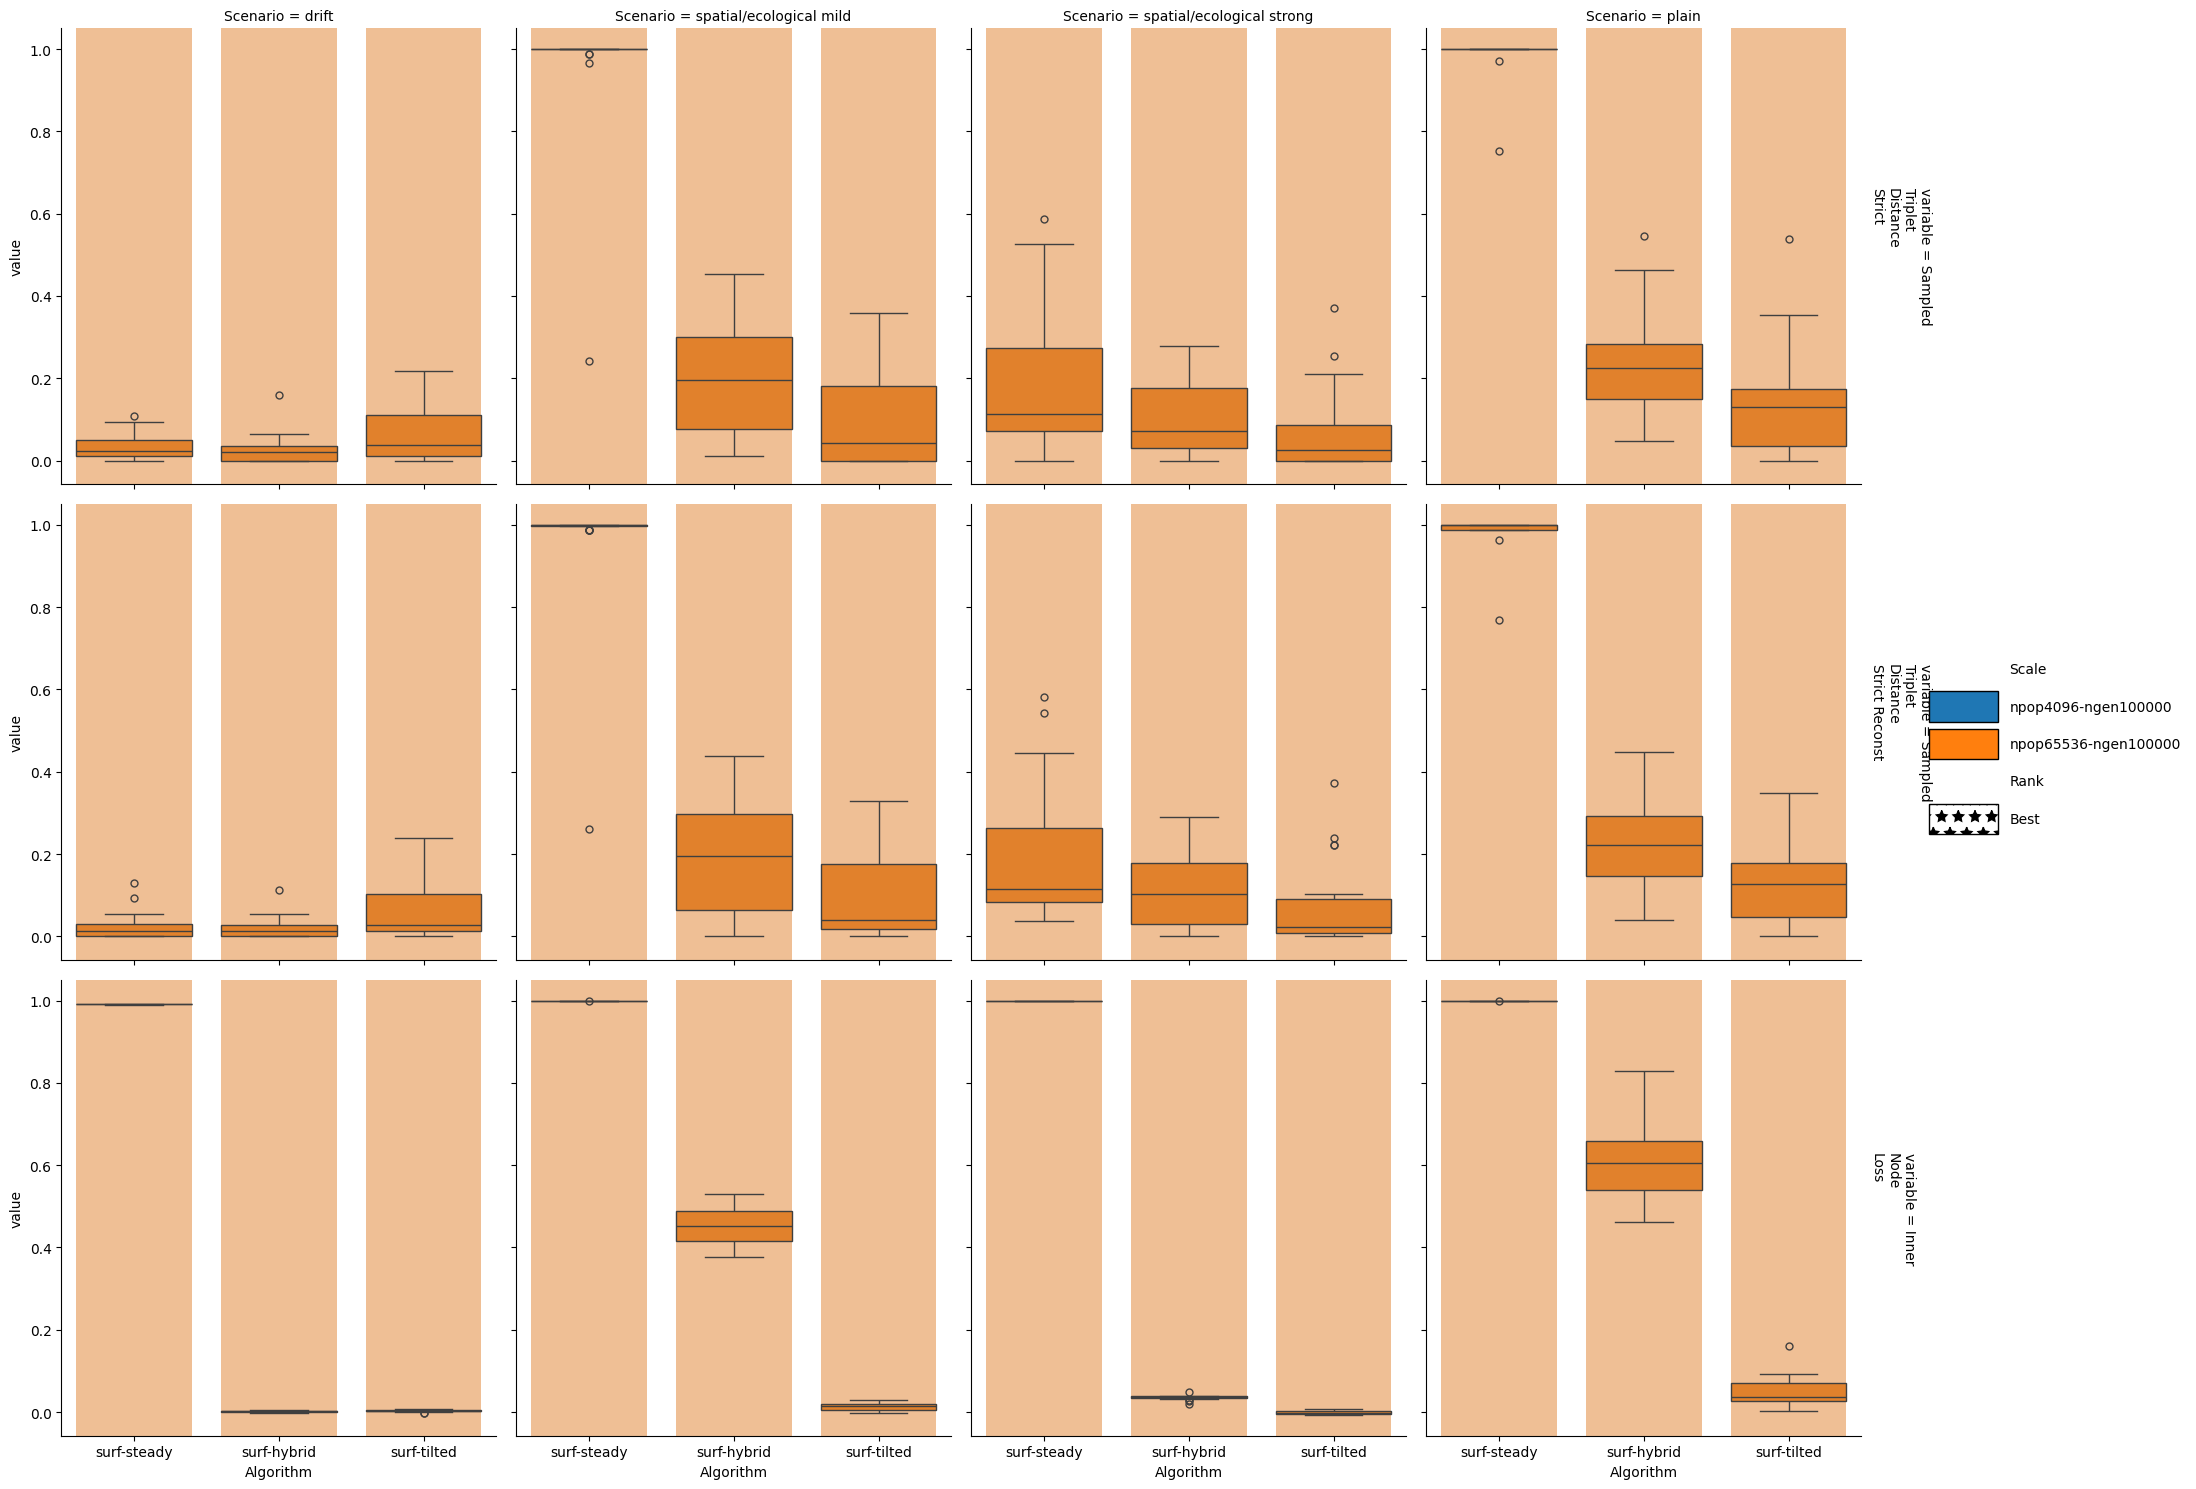

teeplots/a=all+col=scenario+diffwidth=1+dsamp=500+hue=scale+hue-group=inner+post=teed-figure-subplots-adjust-right-0-84+row=variable+score=value+sizebits=256+viz=peckplot+x=algorithm+x-group=outer+y=value+y-gr.../oup=ignore+ext=.pdf


teeplots/a=all+col=scenario+diffwidth=1+dsamp=500+hue=scale+hue-group=inner+post=teed-figure-subplots-adjust-right-0-84+row=variable+score=value+sizebits=256+viz=peckplot+x=algorithm+x-group=outer+y=value+y-gr.../oup=ignore+ext=.png


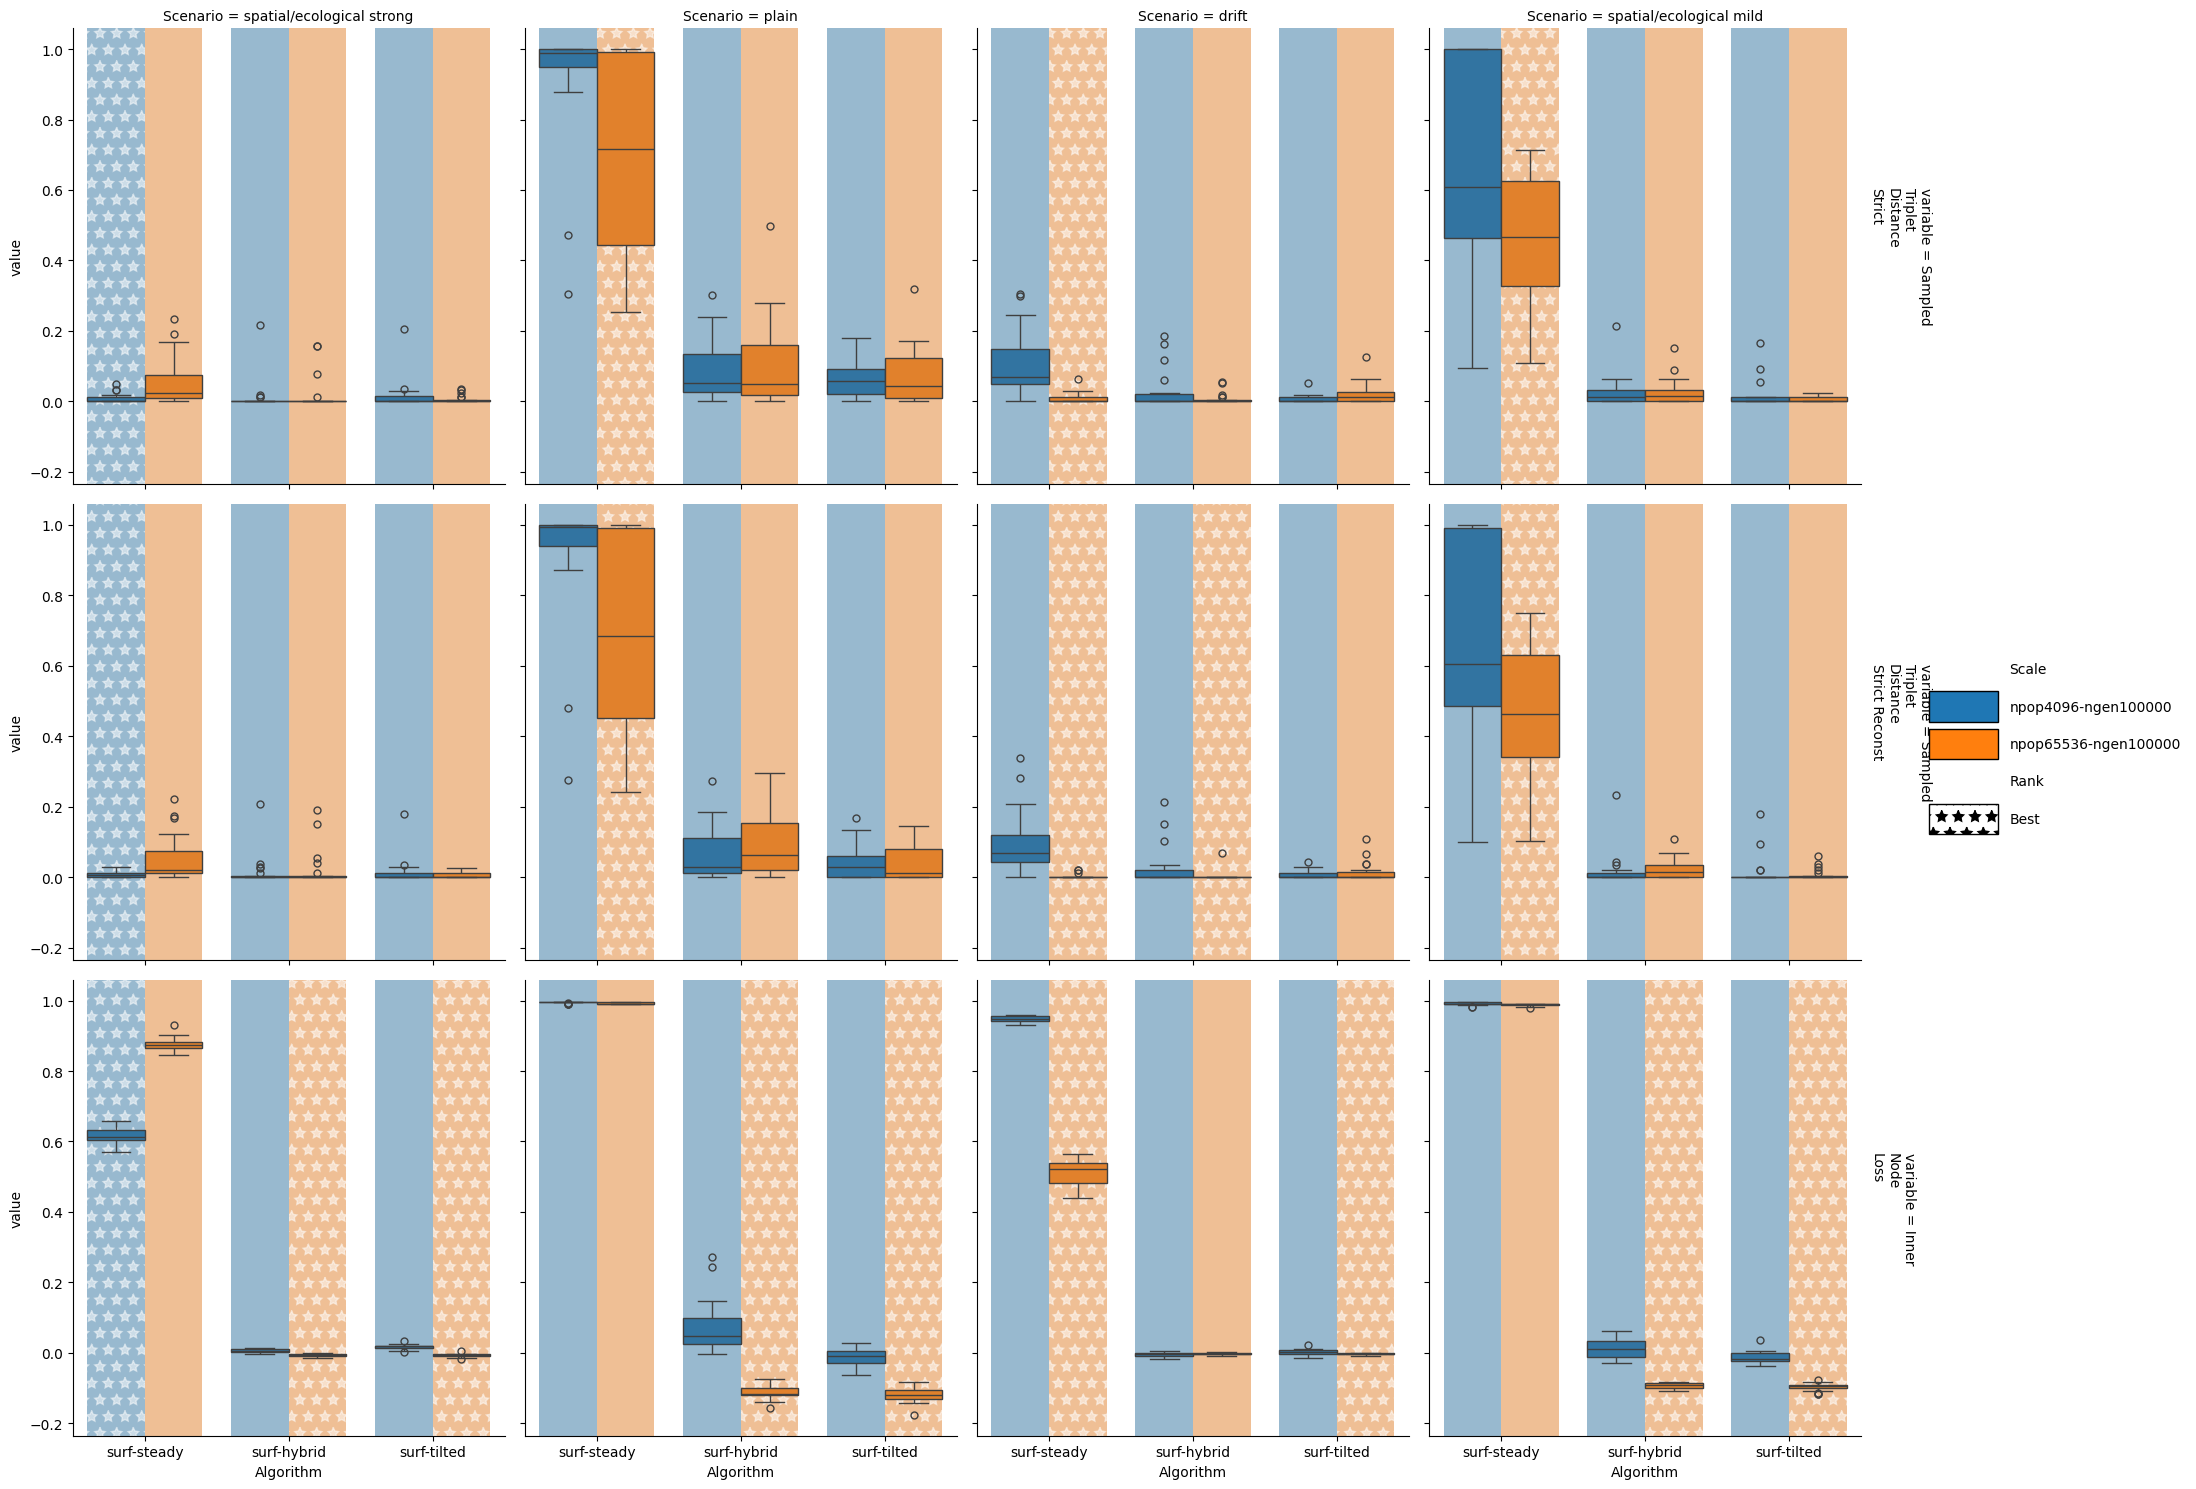

/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `At least two samples are required.` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `At least two samples are required.` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `At least two samples are required.` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `At least two samples are required.` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py

teeplots/a=all+col=scenario+diffwidth=1+dsamp=8000+hue=scale+hue-group=inner+post=teed-figure-subplots-adjust-right-0-84+row=variable+score=value+sizebits=256+viz=peckplot+x=algorithm+x-group=outer+y=value+y-g.../roup=ignore+ext=.pdf


teeplots/a=all+col=scenario+diffwidth=1+dsamp=8000+hue=scale+hue-group=inner+post=teed-figure-subplots-adjust-right-0-84+row=variable+score=value+sizebits=256+viz=peckplot+x=algorithm+x-group=outer+y=value+y-g.../roup=ignore+ext=.png


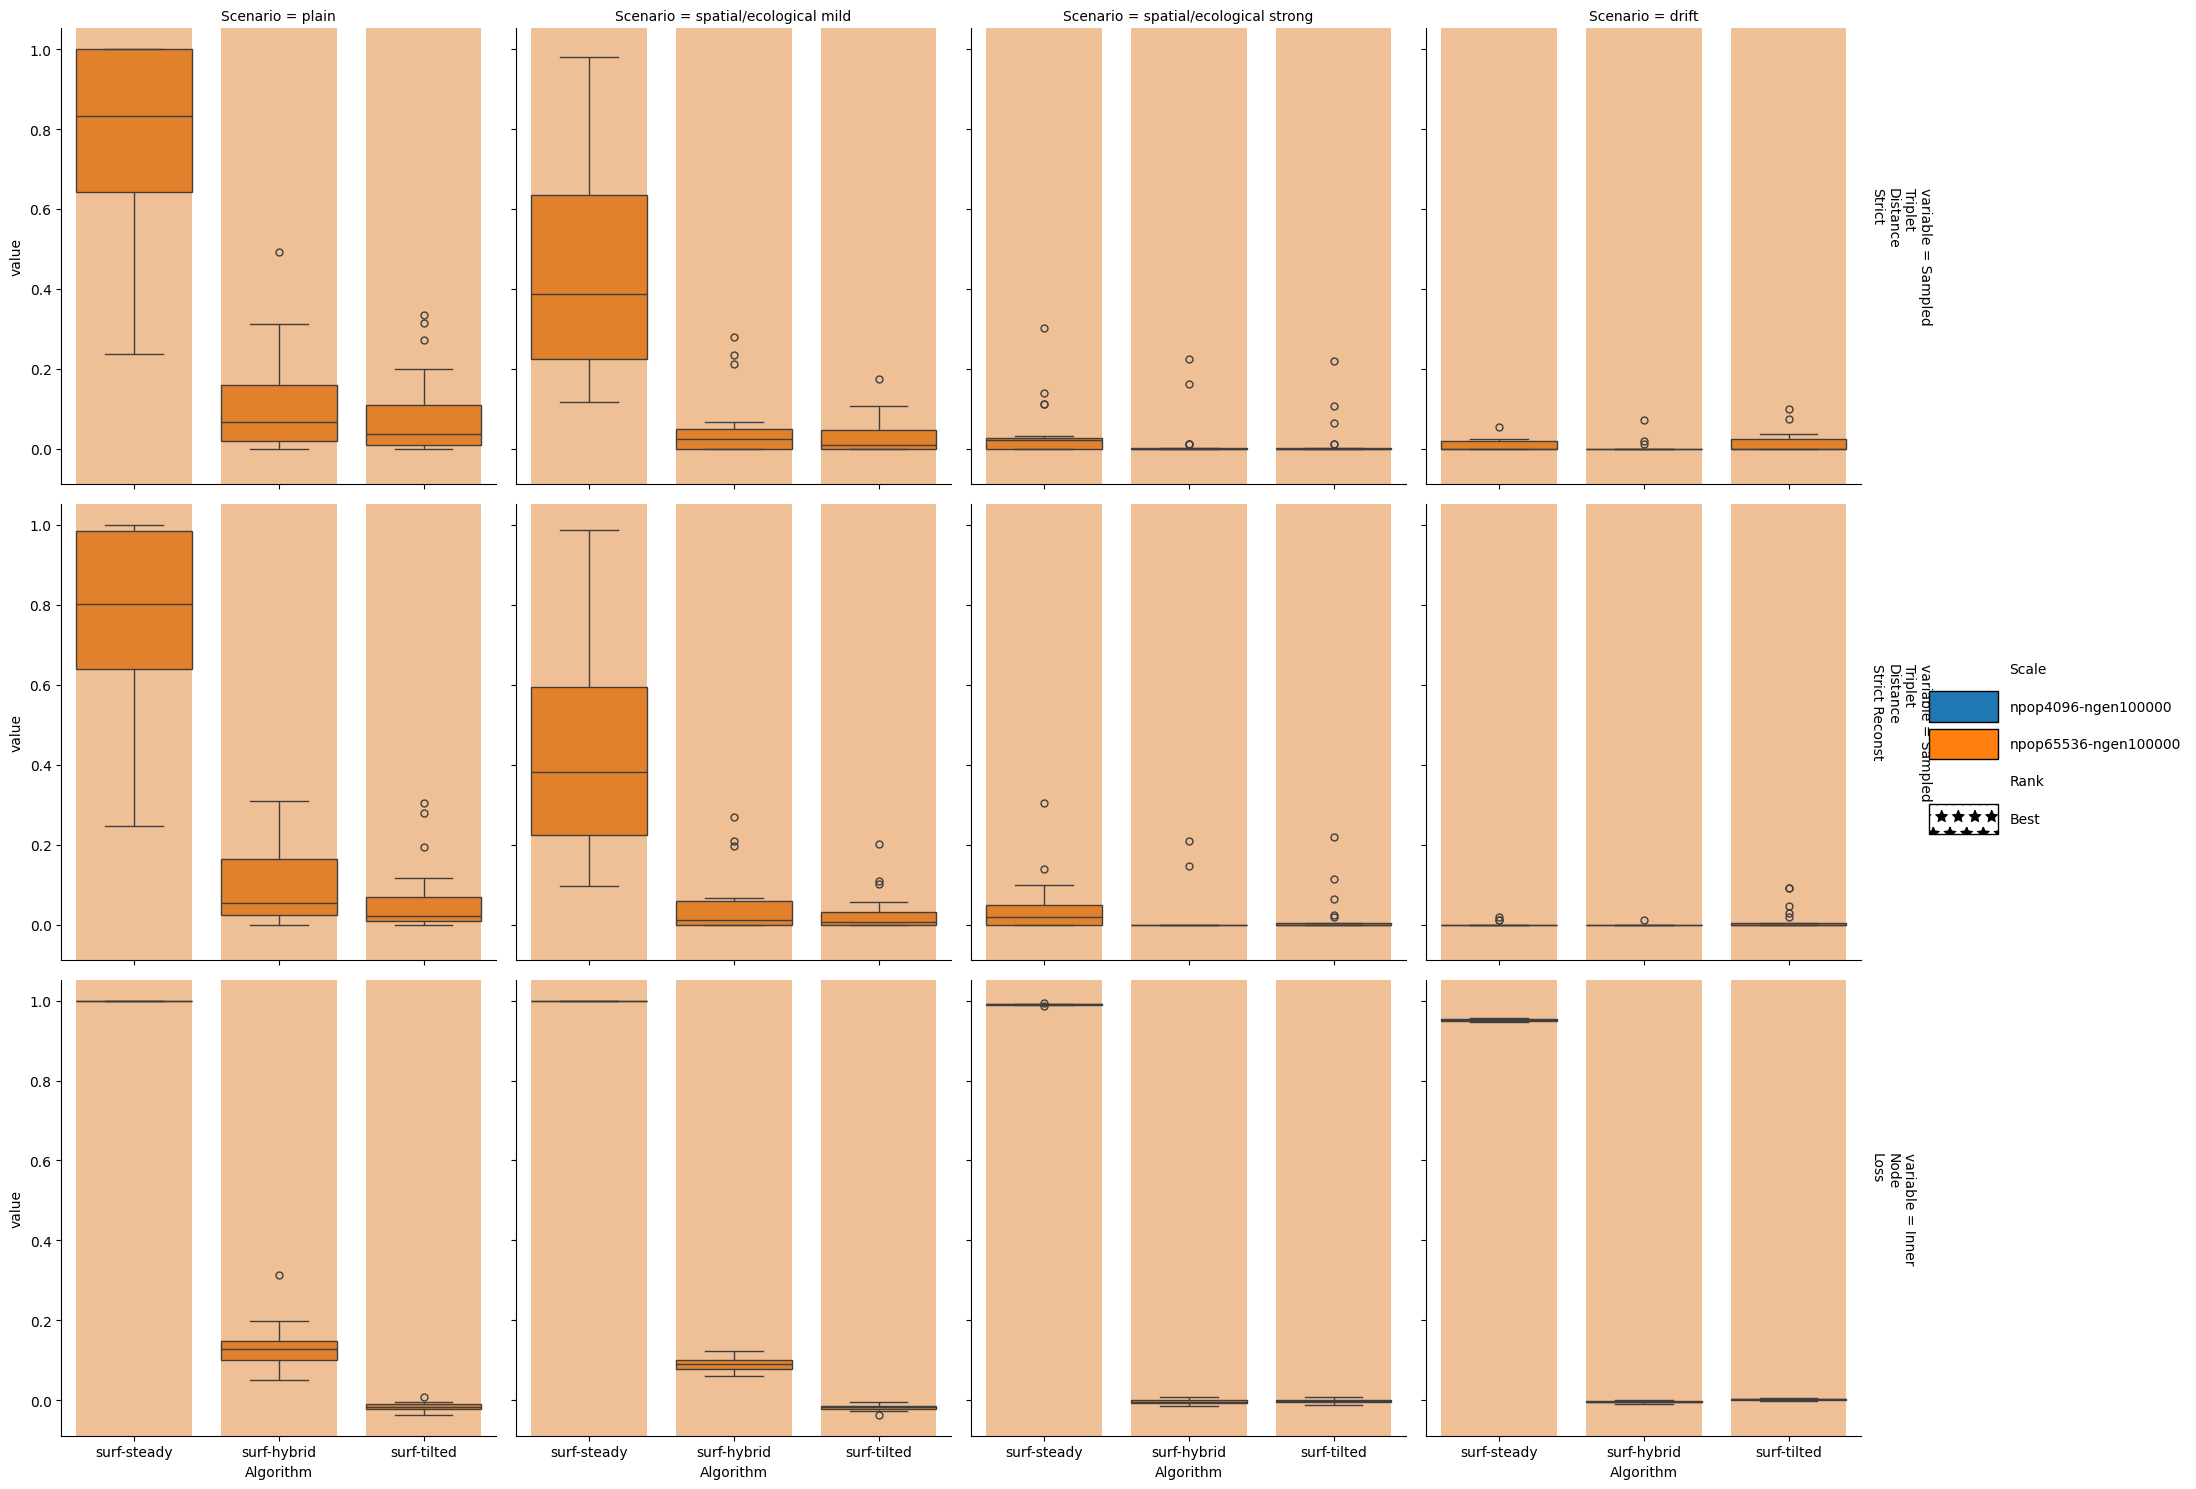

teeplots/a=all+col=scenario+diffwidth=8+dsamp=500+hue=scale+hue-group=inner+post=teed-figure-subplots-adjust-right-0-84+row=variable+score=value+sizebits=256+viz=peckplot+x=algorithm+x-group=outer+y=value+y-gr.../oup=ignore+ext=.pdf


teeplots/a=all+col=scenario+diffwidth=8+dsamp=500+hue=scale+hue-group=inner+post=teed-figure-subplots-adjust-right-0-84+row=variable+score=value+sizebits=256+viz=peckplot+x=algorithm+x-group=outer+y=value+y-gr.../oup=ignore+ext=.png


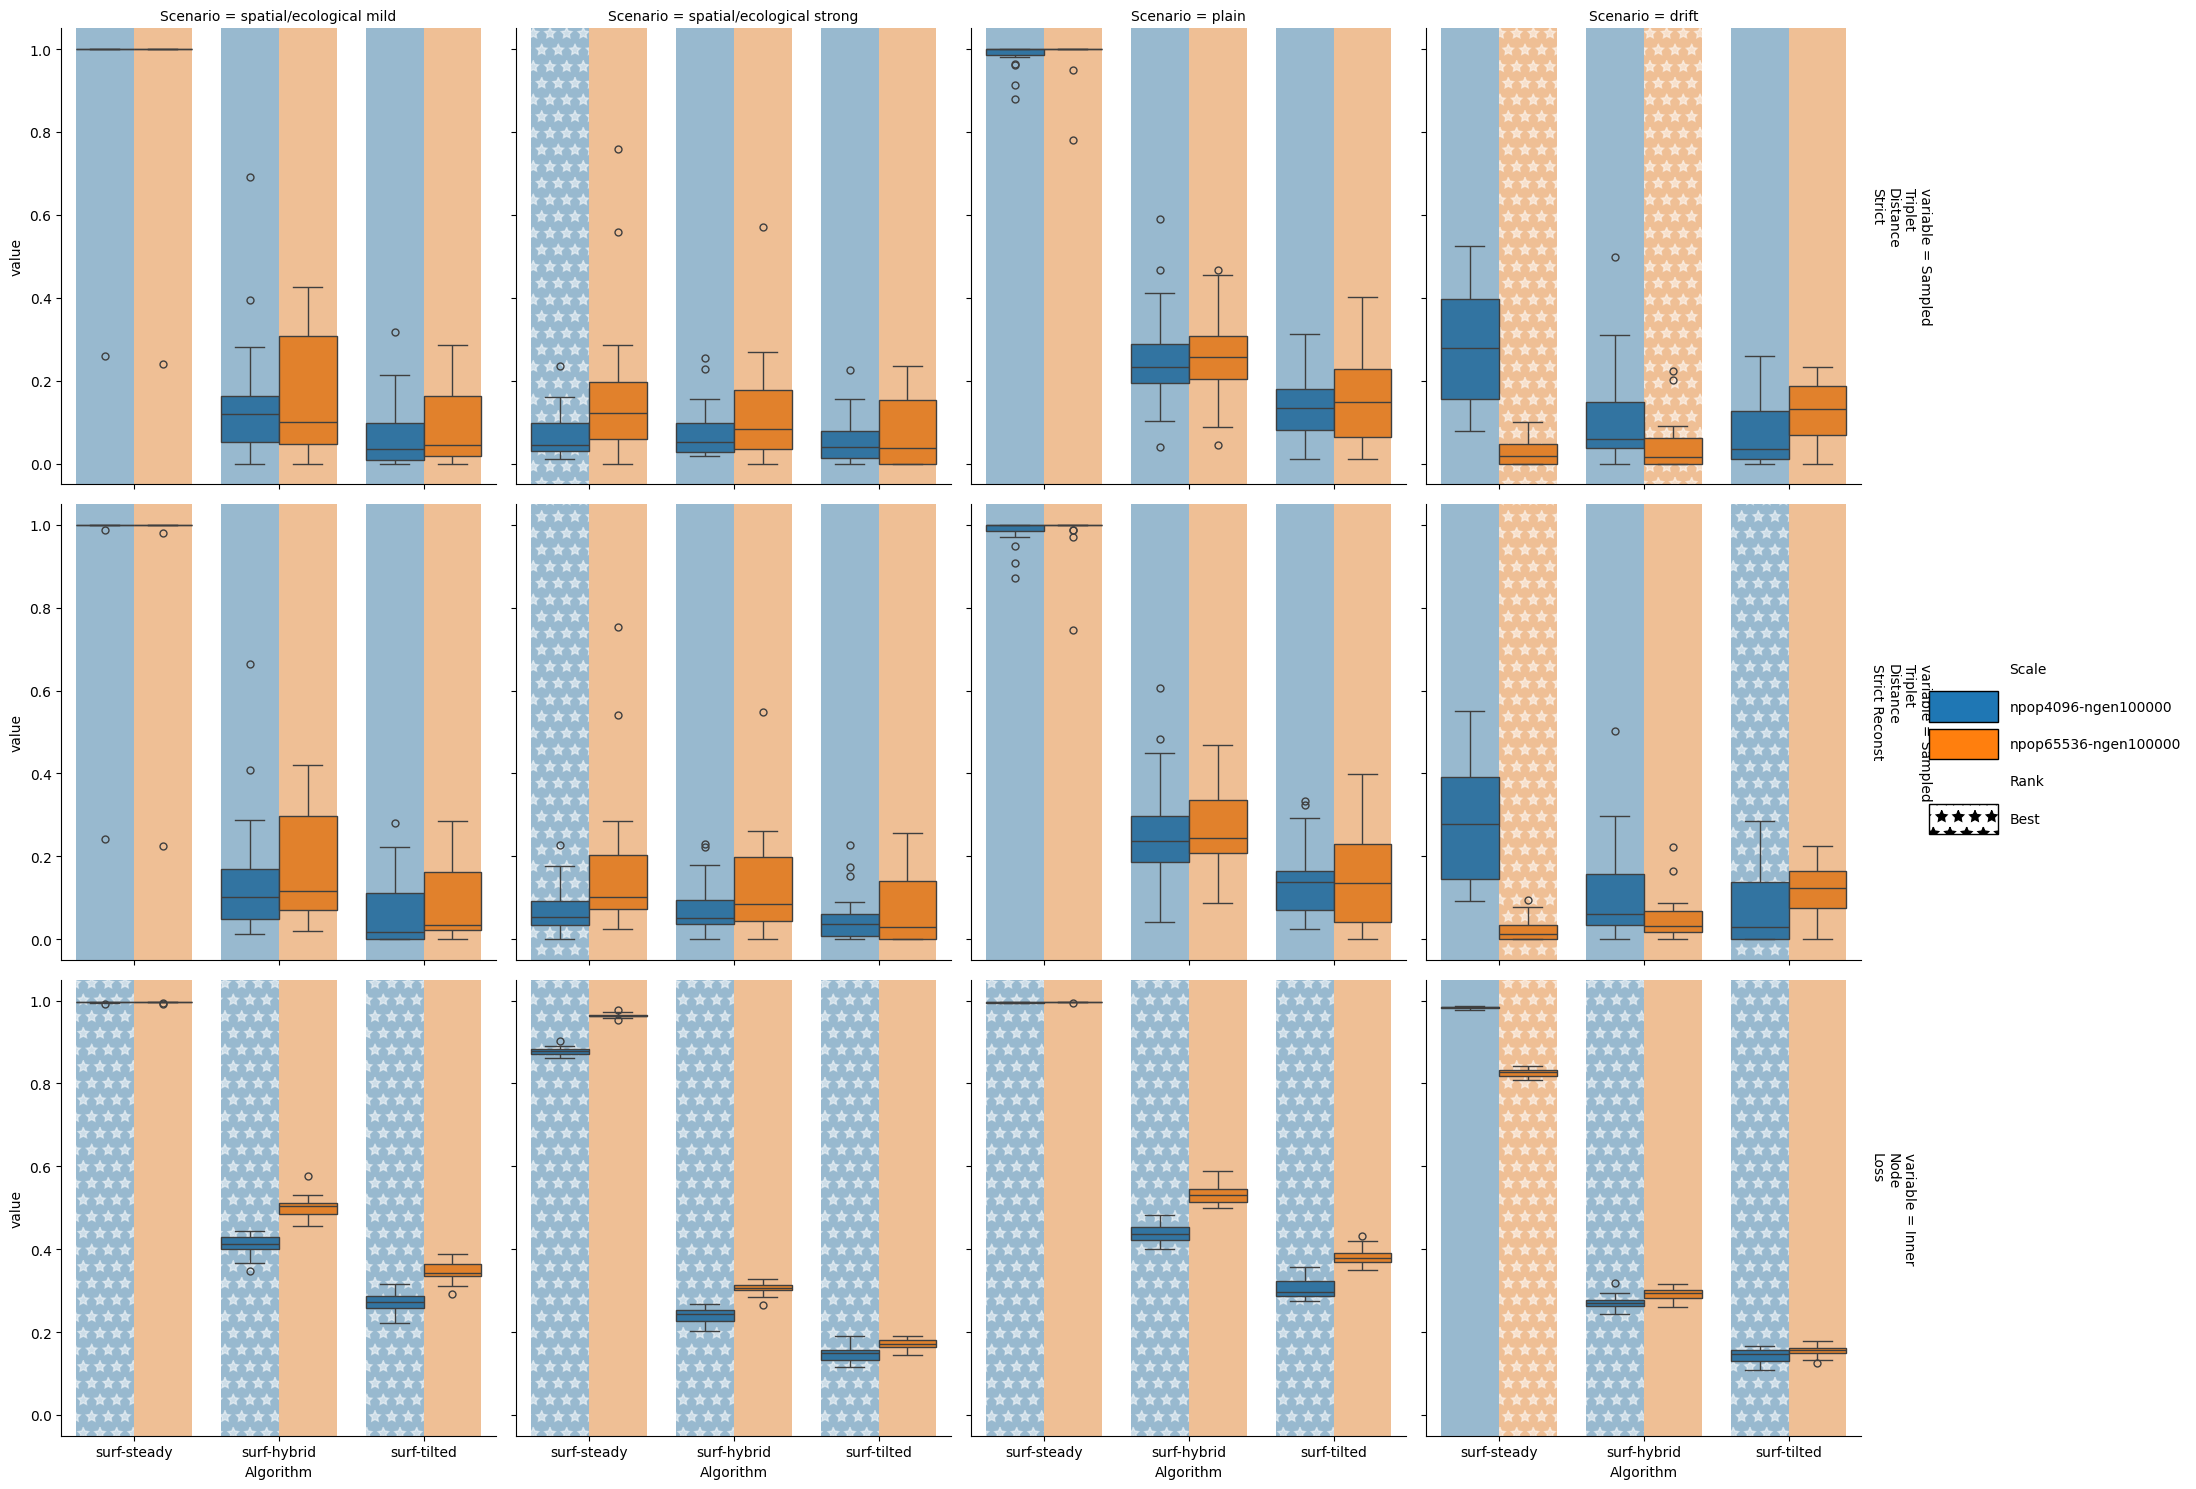

/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `At least two samples are required.` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `At least two samples are required.` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `At least two samples are required.` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `At least two samples are required.` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py

teeplots/a=all+col=scenario+diffwidth=8+dsamp=8000+hue=scale+hue-group=inner+post=teed-figure-subplots-adjust-right-0-84+row=variable+score=value+sizebits=256+viz=peckplot+x=algorithm+x-group=outer+y=value+y-g.../roup=ignore+ext=.pdf


teeplots/a=all+col=scenario+diffwidth=8+dsamp=8000+hue=scale+hue-group=inner+post=teed-figure-subplots-adjust-right-0-84+row=variable+score=value+sizebits=256+viz=peckplot+x=algorithm+x-group=outer+y=value+y-g.../roup=ignore+ext=.png


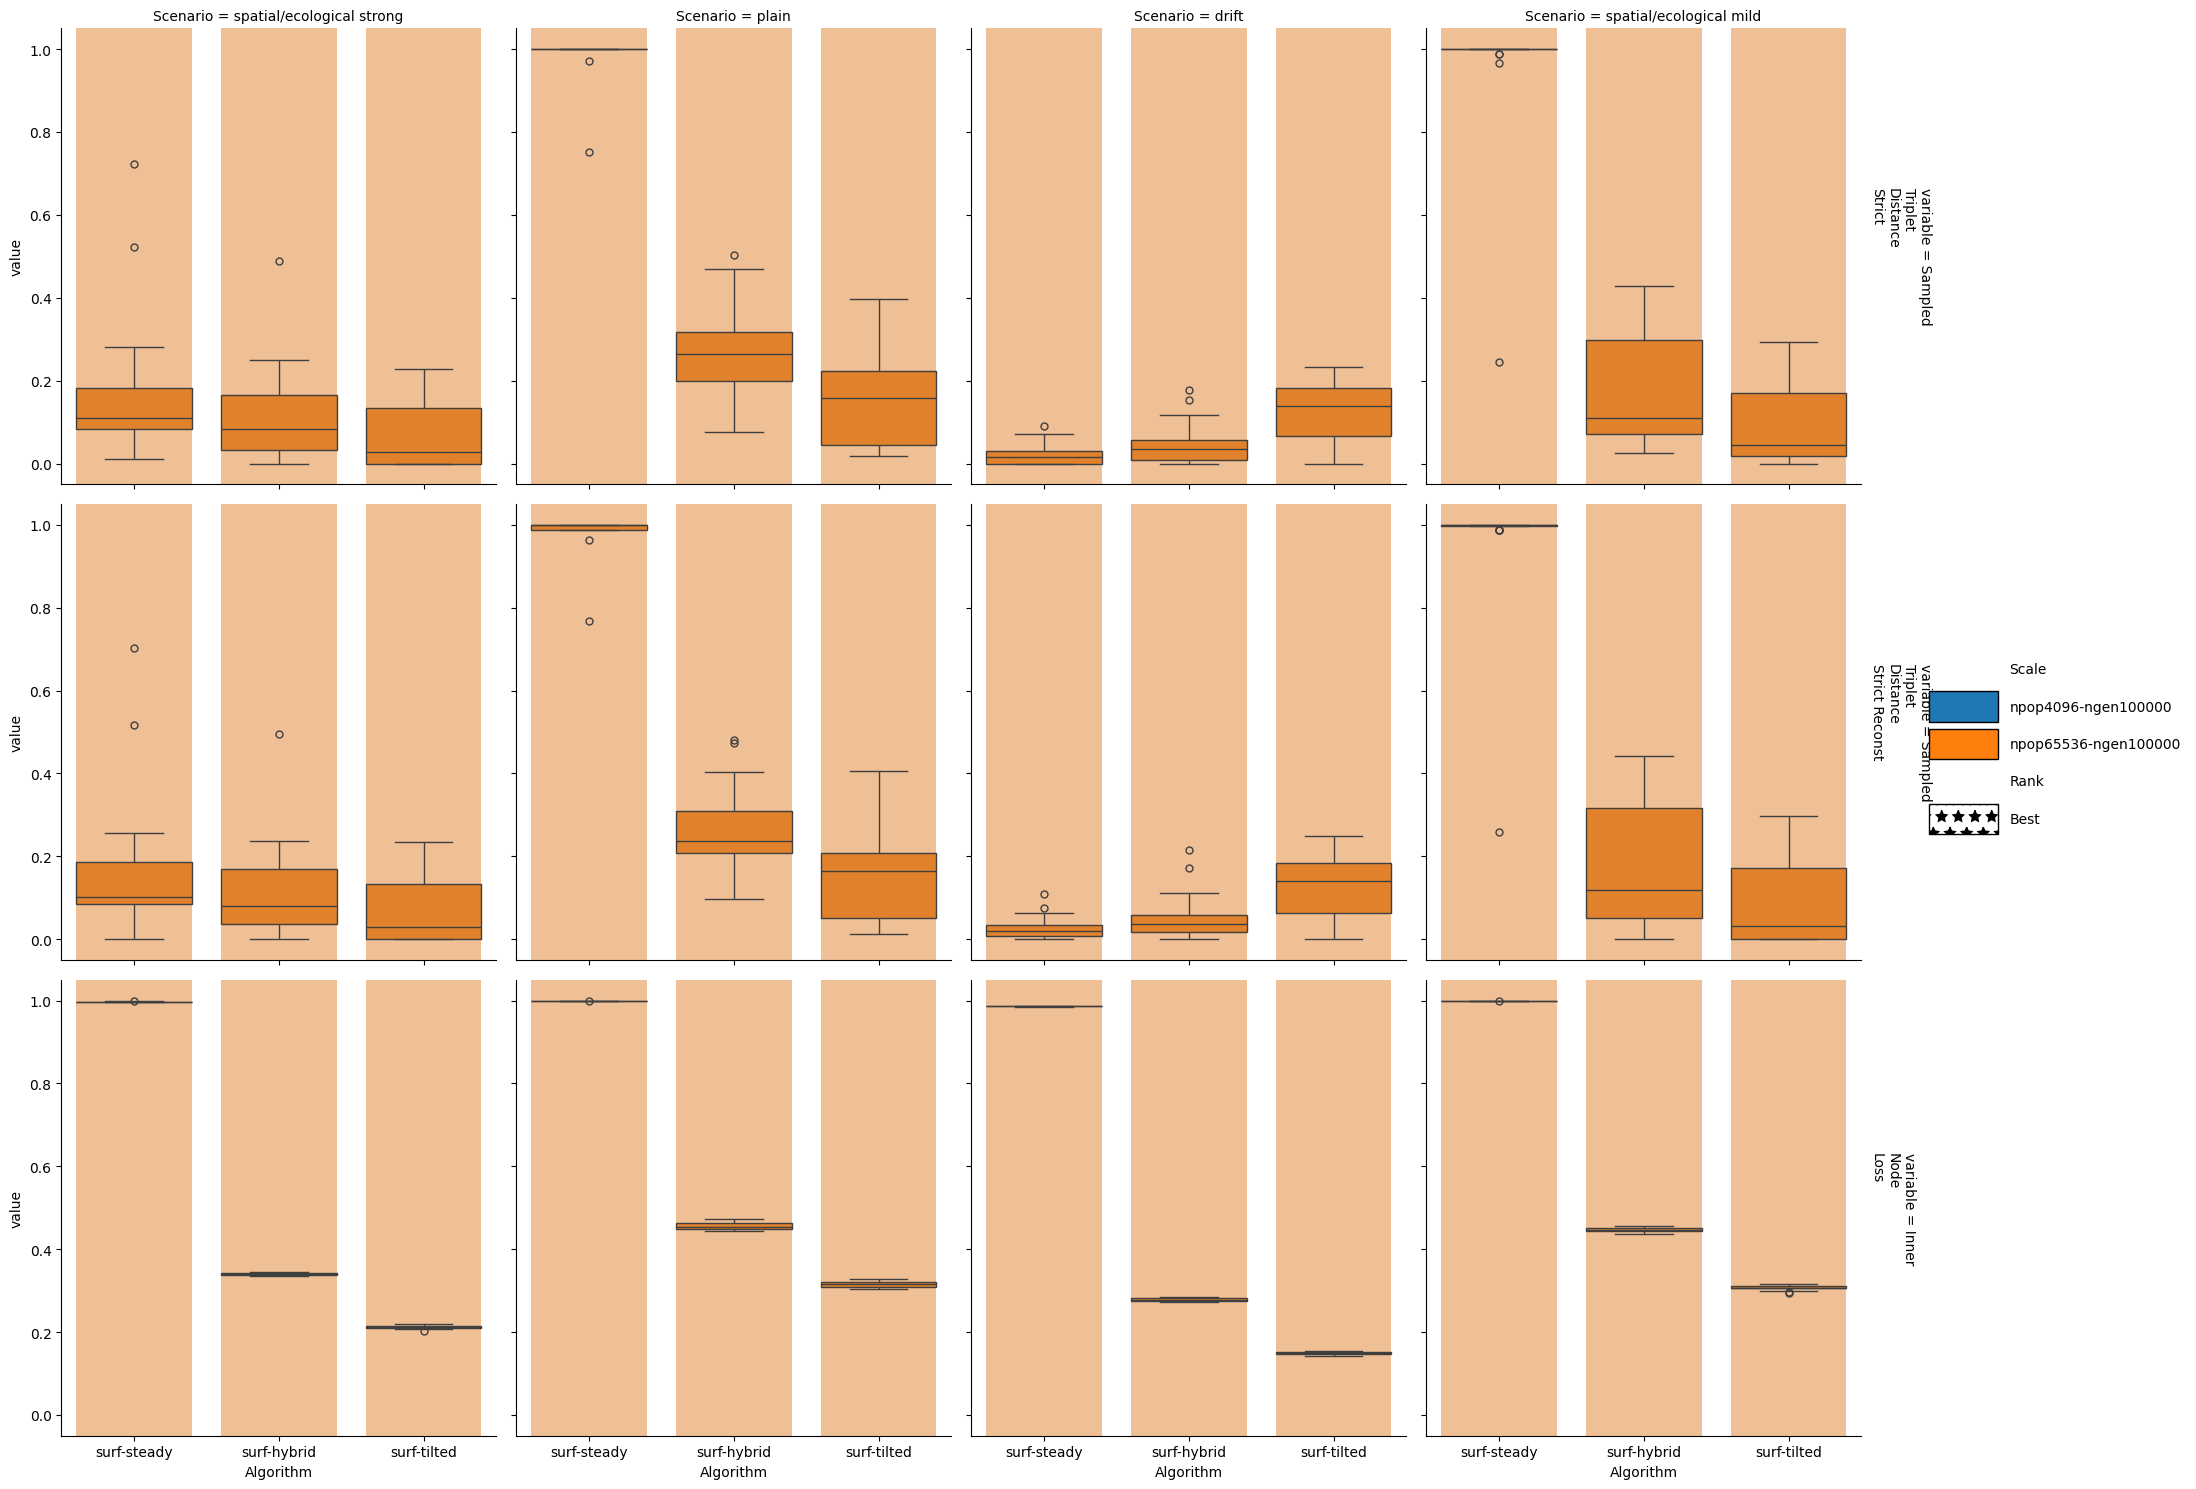

In [12]:
x_order = [
    "surf-steady",
    # "col-steady",
    "surf-hybrid",
    "surf-tilted",
    # "col-tilted",
]
hue_order = [
    "npop4096-ngen100000",
    "npop65536-ngen100000",
]


for (sizebits, diffwidth, dsamp), group in dfx.groupby(
    [
        "Annotation Size (bits)",
        "Differentia Width (bits)",
        "Downsample",
    ],
):
    tp.tee(
        pecking.peckplot,
        data=group,
        score="value",
        x="Algorithm",
        y="value",
        col="Scenario",
        row="variable",
        hue="Scale",
        x_group="outer",
        y_group="ignore",
        hue_group="inner",
        order=x_order,
        hue_order=hue_order,
        skim_hatches=("*",),
        skim_labels=("Best",),
        skimmers=[pecking.skim_lowest],
        margin_titles=True,
        legend_width_inches=3,
        teeplot_outattrs={
            "a": "all",
            "sizebits": sizebits,
            "diffwidth": diffwidth,
            "dsamp": dsamp,
        },
        teeplot_postprocess="teed.figure.subplots_adjust(right=0.84)",
    )


## Reproducibility Information

In [13]:
import datetime

datetime.datetime.now().isoformat()

'2024-04-05T16:42:51.328567'

In [14]:
%load_ext watermark
%watermark

Last updated: 2024-04-05T16:42:51.341607+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 8.22.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.5.0-1017-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit



In [15]:
!pip freeze

alifedata-phyloinformatics-convert==0.16.2
annotated-types==0.6.0
anytree==2.12.1
appdirs==1.4.4
argcomplete==3.2.3
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
asttokens==2.4.1
attrs==23.2.0
Automat==20.2.0
Babel==2.8.0
backstrip==0.2.4
bcrypt==3.2.0
beautifulsoup4==4.12.3
biopython==1.83
bitarray==2.9.2
bitstring==4.1.4
black==22.10.0
bleach==6.1.0
blinker==1.4
Brotli==1.1.0
CacheControl==0.12.10
certifi==2024.2.2
cffi==1.16.0
chardet==4.0.0
charset-normalizer==3.3.2
click==8.1.7
cliffs-delta==1.0.0
cloud-init==23.4.4
colorama==0.4.4
comm==0.2.1
command-not-found==0.3
configobj==5.0.6
constantly==15.1.0
contourpy==1.2.0
cryptography==3.4.8
cssselect==1.1.0
cssselect2==0.7.0
cycler==0.12.1
dataclasses==0.6
dbus-python==1.2.18
debugpy==1.8.1
decorator==5.1.1
defusedxml==0.7.1
DendroPy==4.6.1
Deprecated==1.2.14
distro==1.7.0
distro-info==1.1+ubuntu0.2
distutils-strtobool==0.1.0
entrypoints==0.4
ete3==3.1.3
exceptiongroup==1.2.0
executing==2.0.1
fastjsonschema==2.19.1
fonttools==4.49